# Exploratory Data Analysis

## 1 Contents
- [1 Contents](#1-Contents)
- [2 Introduction](#2-Introduction)
- [3 Imports](#3-Imports)
- [4 Load Data](#4-Load-Data)
- [5 Explore the Data](#5-Explore-the-Data)
  - [5.1 Fire Data](#5.1-Fire-Data)
    - [5.1.1 Pruning Fire Data](#5.1.1-Pruning-Fire-Data)
    - [5.1.2 Fire Missing Values and Bad Values](#5.1.2-Fire-Missing-Values-and-Bad-Values)
    - [5.1.3 More Fire Columns](#5.1.3-More-Fire-Columns)
  - [5.2 Climate Data](#5.2-Climate-Data)
  - [5.3 Month Data](#5.3-Month-Data)
  - [5.4 County Data](#5.4-County-Data)
    - [5.4.1 Adding per county fire data](#5.4.1-Adding-per-county-fire-data)
    - [5.4.2 Adding population, area, and density](#5.4.2-Adding-population,-area,-and-density)
    - [5.4.3 Month data for counties](#5.4.3-Month-data-for-counties)
  - [5.5 Location Mapping](#5.5-Location-Mapping)
    - [5.5.1 Heatmap by months](#5.5.1-Heatmap-by-months)
    - [5.5.2 Heatmap by years](#5.5.2-Heatmap-by-years)
  - [5.6 Data Visualization](#5.6-Data-Visualization)
- [6 Summary](#6-Summary)
  - [6.1 Save New DataFrames](#6.1-Save-New-DataFrames)

## 2 Introduction

The purpose of this notebook is to explore the data to understand each feature and their relationships with one another and to add more features that may be relevant in solving the problem.

The notebook starts with dealing with missing and bad values (by removal, verification, or imputation) for our two main dataframes, fire and climate. Easy-to-access information from the Internet is also added to our database. For example, some more county information is added.

## 3 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
import geopandas
import folium
from folium import plugins

## 4 Load Data

In [2]:
fire_df = pd.read_csv('../data/interim/wildfire_data.csv', index_col=0)
climate_df = pd.read_csv('../data/interim/climate_data.csv', index_col=0)
stations_df = pd.read_csv('../data/interim/stations_data.csv', index_col=0)
county_df = pd.read_csv('../data/interim/county_data.csv', index_col=0)
county_latlong_df = pd.read_csv('../data/raw/county_coord.csv')

Data from 'county_coord.csv' was picked up from [Opendatasoft](https://public.opendatasoft.com/explore/dataset/us-county-boundaries/).

In [3]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 0 to 1635
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1606 non-null   float64
 1   Active                1609 non-null   bool   
 2   AdminUnit             1609 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1609 non-null   int64  
 5   CalFireIncident       1609 non-null   bool   
 6   CanonicalUrl          1609 non-null   object 
 7   ConditionStatement    261 non-null    object 
 8   ControlStatement      109 non-null    object 
 9   Counties              1609 non-null   object 
 10  CountyIds             1609 non-null   object 
 11  CrewsInvolved         165 non-null    float64
 12  Dozers                118 non-null    float64
 13  Engines               185 non-null    float64
 14  Extinguished          1550 non-null   object 
 15  Fatalities           

In [4]:
fire_df.head(2)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresThreatened,UniqueId,Updated,WaterTenders,Counties List
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17 15:25:00+00:00,Finalized,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06 18:30:00+00:00,NaN,['Tuolumne']
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30 15:28:00+00:00,Finalized,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08 18:30:00+00:00,NaN,['Los Angeles']


In [5]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128125 entries, 0 to 128124
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Stn Id                128125 non-null  int64  
 1   Stn Name              128125 non-null  object 
 2   CIMIS Region          128125 non-null  object 
 3   Date                  128125 non-null  object 
 4   ETo (in)              128042 non-null  float64
 5   Precip (in)           128125 non-null  float64
 6   Sol Rad (Ly/day)      128125 non-null  float64
 7   Avg Vap Pres (mBars)  128125 non-null  float64
 8   Max Air Temp (F)      128122 non-null  float64
 9   Min Air Temp (F)      128124 non-null  float64
 10  Avg Air Temp (F)      128120 non-null  float64
 11  Max Rel Hum (%)       128125 non-null  float64
 12  Min Rel Hum (%)       128125 non-null  float64
 13  Avg Rel Hum (%)       128112 non-null  float64
 14  Dew Point (F)         128112 non-null  float64
 15  

In [6]:
climate_df.head(2)

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Target
0,2,FivePoints,San Joaquin Valley,2018-01-01,0.06,0.0,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,0
1,2,FivePoints,San Joaquin Valley,2018-01-02,0.04,0.0,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,0


In [7]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StationNbr      267 non-null    int64  
 1   Name            267 non-null    object 
 2   City            267 non-null    object 
 3   RegionalOffice  267 non-null    object 
 4   County          267 non-null    object 
 5   ConnectDate     267 non-null    object 
 6   DisconnectDate  267 non-null    object 
 7   IsActive        267 non-null    bool   
 8   IsEtoStation    267 non-null    bool   
 9   Elevation       267 non-null    int64  
 10  GroundCover     267 non-null    object 
 11  HmsLatitude     267 non-null    object 
 12  HmsLongitude    267 non-null    object 
 13  ZipCodes        267 non-null    object 
 14  SitingDesc      0 non-null      float64
dtypes: bool(2), float64(1), int64(2), object(10)
memory usage: 29.7+ KB


In [8]:
stations_df.head()

,StationNbr,Name,City,RegionalOffice,County,ConnectDate,DisconnectDate,IsActive,IsEtoStation,Elevation,GroundCover,HmsLatitude,HmsLongitude,ZipCodes,SitingDesc
0,1,Fresno/F.S.U. USDA,Fresno,South Central Region Office,Fresno,6/7/1982,9/25/1988,False,True,340,Grass,36º48'52N / 36.814444,-119º43'54W / -119.731670,"['93766', '93762', '93761', '93760', '93759', ...",NaN
1,2,FivePoints,Five Points,South Central Region Office,Fresno,6/7/1982,12/31/2050,True,True,285,Grass,36º20'10N / 36.336222,-120º6'46W / -120.112910,['93624'],NaN
2,3,Beach /Santa Cruz CO,Watsonville,South Central Region Office,Santa Cruz,5/30/1982,8/25/1986,False,True,10,Grass,36º52'50N / 36.880556,-121º47'36W / -121.793330,"['95077', '95076', '95075', '95019', '95018']",NaN
3,4,Webb /Santa Cruz CO,Watsonville,South Central Region Office,Santa Cruz,5/30/1982,4/29/1988,False,True,230,Grass,36º58'21N / 36.9725,-121º43'34W / -121.726110,"['95077', '95076', '95075', '95019', '95018']",NaN
4,5,Shafter,Shafter,South Central Region Office,Kern,6/1/1982,12/31/2050,True,True,360,Grass,35º31'57N / 35.532556,-119º16'54W / -119.281790,"['93263', '93280', '93388']",NaN


## 5 Explore the Data

### 5.1 Fire Data

The fire data is large, and some of the information will be extraneous. To tackle this, the data will be divided into categories: features that are most likely useful, features that may need further consideration, and features that are unimportant.

Most likely useful: `AcresBurned`, `CanonicalUrl`, `Counties`, `CountyIds`, `Extinguished`, `Latitude`, `Longitude`, `Name`, `Started`, `UniqueId`, `Updated`, and `Counties List`.

Further consider: `ArchiveYear`, `CalFireIncident`, `ConditionStatement`, `CrewsInvolved`, `Engines`, `Featured`, `Final`, `Location`, `MajorIncident`, `PersonnelInvolved`, `Public`, `SearchDescription`, and `Status`. Recalling from the first data wrangling, some of these features were extremely sparse. Those with 90% or more missing values include `FuelType`, `Fatalities`, `StructuresThreatened`, `AirTankers`, `StructuresDamaged`, `Helicopters`, `ControlStatement`, `Injuries`, `Dozers`, `WaterTenders`, and `StructuresDestroyed`.

Unimportant features: `Active` because all of the fires have been marked False, and `SearchKeywords` because this is for navigating to the fire's webpage. `AdminUnit` because this is qualitative information that doesn't really tell us about the fire.

#### 5.1.1 Pruning Fire Data

In [9]:
fire_df.drop(['Active', 'SearchKeywords', 'AdminUnit'], inplace=True, axis=1)

In [10]:
fire_df['FuelType'].value_counts()

Grass               4
grass               2
timber              1
Vegetation          1
Brush               1
grass and brush     1
Grass and Brush     1
brush and timber    1
Name: FuelType, dtype: int64

In [11]:
fire_df['ControlStatement'].unique()[:3]

array([nan,
       'Hwy 243 remains closed between Twin Pines Road and Westley Street in Banning due to road damage.',
       'Oak Knolls Road'], dtype=object)

In [12]:
np.sum(fire_df['ControlStatement'].isna())

1500

In [13]:
fire_df['Location'].head()

0              3 miles east of Groveland along Hwy 120
1                              Angeles National Forest
2                Hwy 243 & Hwy 74 near Mountain Center
3              Deadwood Ridge, northeast of Foresthill
4    Southbound Highway 101 at Camarillo Springs Ro...
Name: Location, dtype: object

`FuelType` and `ControlStatement` are both very sparse and are comprised of strings, which may be more useful if they all contained information and the information provided was more standardized. `ConditionStatement` and `SearchDescription` contain all descriptive text information. The `Location` column is also qualitative, giving detailed descriptions of the incident location, but language processing is probably beyond the scope of this notebook and perhaps some of the information given could be somewhat redundant, considering we have locations given by lat/long coordinates and by county.

In [14]:
fire_df.drop(['FuelType', 'ConditionStatement', 'ControlStatement', 'SearchDescription', 'Location'], inplace=True, axis=1)

I still don't know what `Featured` means.

In [15]:
fire_df['Final'].value_counts()

True     1607
False       2
Name: Final, dtype: int64

In [16]:
fire_df[~fire_df['Final']].T

,1164,1635
AcresBurned,186.0,NaN
AirTankers,NaN,NaN
ArchiveYear,2018,2019
CalFireIncident,True,False
CanonicalUrl,/incidents/2018/11/12/peak-fire/,/incidents/2019/10/14/johnson-fire/
Counties,Ventura,Riverside
CountyIds,56,33
CrewsInvolved,NaN,NaN
Dozers,NaN,NaN
Engines,NaN,NaN


In [17]:
fire_df['Public'].value_counts()

True    1609
Name: Public, dtype: int64

In [18]:
fire_df['Status'].value_counts()

Finalized    1607
Inactive        2
Name: Status, dtype: int64

`Final` is almost all true, and `Public` is all true. Similarly, `Status` is almost unanimously 'Finalized'.

In [19]:
fire_df.drop(['Final', 'Public', 'Status'], inplace=True, axis=1)

In [20]:
fire_df['ArchiveYear'] = pd.to_datetime(fire_df['ArchiveYear'], format='%Y').dt.year
fire_df['Extinguished'] = pd.to_datetime(fire_df['Extinguished'])
fire_df['Started'] = pd.to_datetime(fire_df['Started'])
fire_df['Updated'] = pd.to_datetime(fire_df['Updated'])

In [21]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 0 to 1635
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1606 non-null   float64            
 1   AirTankers            28 non-null     float64            
 2   ArchiveYear           1609 non-null   int64              
 3   CalFireIncident       1609 non-null   bool               
 4   CanonicalUrl          1609 non-null   object             
 5   Counties              1609 non-null   object             
 6   CountyIds             1609 non-null   object             
 7   CrewsInvolved         165 non-null    float64            
 8   Dozers                118 non-null    float64            
 9   Engines               185 non-null    float64            
 10  Extinguished          1550 non-null   datetime64[ns, UTC]
 11  Fatalities            13 non-null     float64            
 12  Featur

In [22]:
fire_df.reset_index(drop=True, inplace=True)

#### 5.1.2 Fire Missing Values and Bad Values

In [23]:
def gen_na_table(data):
    """
    Given a dataframe, this function will generate a table of the percentage of null values in each column.
    
    data - The DataFrame to generate a table for.
    """
    missing_data = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis = 1)
    missing_data.columns = ['count', '%']
    return missing_data.sort_values(by='%', ascending=False)

In [24]:
missing_fire = gen_na_table(fire_df)
missing_fire[missing_fire['%'] > 0]

,count,%
Fatalities,1596,99.192045
StructuresThreatened,1586,98.570541
AirTankers,1581,98.259789
StructuresDamaged,1549,96.270976
Helicopters,1528,94.965817
Injuries,1500,93.225606
Dozers,1491,92.666252
WaterTenders,1468,91.236793
StructuresDestroyed,1451,90.180236
CrewsInvolved,1444,89.745183


##### 5.1.2.1 Excessively missing values

There is a significant amount of missing values, and it cannot be ascertained whether these were simply not recorted or if they should just be 0. It seems likely that if there is a reported fire, there would be a response for the fire, so perhaps at least some number should be recorded for the response resources, such as `PersonnelInvolved`, `CrewsInvolved`, `Engines`, and so on. I am more inclined to assume that these figures are not standardized or required from all of the different administration units, or perhaps they were not required to be added to the web pages that the data was scraped from.

In [25]:
fire_df = fire_df[fire_df.columns[fire_df.isnull().mean() < .8]]

##### 5.1.2.2 Missing AcresBurned

In [26]:
fire_df[fire_df['AcresBurned'].isna()].T

,1606,1607,1608
AcresBurned,NaN,NaN,NaN
ArchiveYear,2019,2019,2019
CalFireIncident,False,False,False
CanonicalUrl,/incidents/2019/11/25/cashe-fire/,/incidents/2019/10/22/oak-fire/,/incidents/2019/10/14/johnson-fire/
Counties,Yolo,San Diego,Riverside
CountyIds,57,37,33
Extinguished,NaT,NaT,NaT
Featured,False,False,False
Latitude,38.734634,33.351145,33.45148
Longitude,-121.729691,-117.403719,-116.05898


`AcresBurned` values could not be found for Cashe Fire and Oak Fire, both of 2019, but Johnson Fire's could be found both on its own incidents [page](https://www.fire.ca.gov/incidents/2019/10/14/johnson-fire/) and in Cal Fire's big CSV, which can be found at the bottom of [this page](https://www.fire.ca.gov/incidents). The `Extinguished` date also appears in these, so that will be corrected now as well.

In [27]:
fire_df.loc[1608, 'AcresBurned'] = 75
fire_df.loc[1608, 'Extinguished'] = pd.to_datetime('2019-10-16T11:53:00Z')
fire_df.iloc[1608]

AcresBurned                                        75.0
ArchiveYear                                        2019
CalFireIncident                                   False
CanonicalUrl        /incidents/2019/10/14/johnson-fire/
Counties                                      Riverside
CountyIds                                            33
Extinguished                  2019-10-16 11:53:00+00:00
Featured                                          False
Latitude                                       33.45148
Longitude                                    -116.05898
MajorIncident                                     False
Name                                      Johnson Fire 
Started                       2019-10-14 15:32:20+00:00
UniqueId           8bf75401-999f-42bd-8c0a-8db508591545
Updated                2019-10-30 10:14:19.580000+00:00
Counties List                             ['Riverside']
Name: 1608, dtype: object

In [28]:
fire_df['AcresBurned'].describe()

count      1607.000000
mean       3239.627878
std       18665.108537
min           0.000000
25%          35.000000
50%          97.000000
75%         400.000000
max      410203.000000
Name: AcresBurned, dtype: float64

Given how vastly different the number of `AcresBurned` can be, it's hard to say if the remaining two missing values should be assumed or calculated statistically. Recall that the minimum acres burned is 0 and the maximum is 410203. On a related note, `AcresBurned` is stored as a float in the DataFrame, but the values are all integers, which explains a value of 0 acres burned--it is rounded down.

##### 5.1.2.3 Missing Extinguished

In [29]:
missing_extinguished = fire_df[fire_df['Extinguished'].isna()]

In [30]:
missing_extinguished_urls = missing_extinguished['CanonicalUrl']

For missing values of `Extinguished`, these may be checked or approximated. The 'large' fires (defined by Redbooks as larger than 300 acres) containment date can be found in [Redbooks' statistics pages](https://www.fire.ca.gov/our-impact/statistics), and the hours and minutes will be adopted from the time of the `Updated` or `Started` value. We don't have a cross-reference for smaller fires, but these will be approximated in two ways. Since all fires also have an `Updated` timestamp and the fires have all been marked as contained/inactive, the `Extinguished` field will adopt the `Updated` timestamp; the only time this would require further scrutiny is if the `Updated` timestamp looks suspiciously like a default or deadline value. When both the `Updated` timestamp fail and the fire is small or Redbooks fails us, then it will just be assigned to the next day.

In [31]:
# In retrospect, I could've manually changed the ones that need manual adjustments and then filled the rest in with Updated
# Indices that will just take Updated as Extinguished
ext_to_up_idx = [1352, 1354, 1360, 1366, 1368, 1415, 1432, 1433, 1441, 1447, 1450, 1452, 1459, 1462, 1464, 1470, 1471,
                 1479, 1486, 1488, 1489, 1490, 1495, 1497, 1502, 1510, 1511, 1514, 1518, 1520, 1524, 1526, 1540, 1541,
                 1543, 1545, 1550, 1551, 1563, 1601, 1606, 1607]
# Indices that need to be manually input
idx_date = { 1346:'2019-08-20T16:07:03Z', 1347:'2019-10-15T15:14:13Z', 1350:'2019-11-25T13:55:37Z',
          1371:'2019-09-25T15:17:31Z', 1378:'2019-10-20T16:15:12Z', 1380:'2019-10-01T11:24:11Z',
          1381:'2019-10-31T14:51:46Z', 1382:'2019-10-31T14:16:21Z', 1393:'2019-09-25T11:20:48Z',
          1404:'2019-09-04T15:31:59Z', 1407:'2019-09-21T15:02:08Z', 1412:'2019-09-17T17:53:00Z',
          1416:'2019-08-15T16:15:56Z', 1418:'2019-09-20T14:46:11Z', 1421:'2019-08-01T15:43:48Z',
          1562:'2019-10-18T20:06:00Z' }

set(missing_extinguished_urls.index) - set(idx_date.keys()) - set(ext_to_up_idx)

set()

In [32]:
for idx,datetime in idx_date.items():
    fire_df.loc[idx, 'Extinguished'] = datetime

for idx in ext_to_up_idx:
    fire_df.loc[idx, 'Extinguished'] = fire_df.loc[idx, 'Updated']

In [33]:
fire_df['Extinguished'].isna().sum()

0

##### 5.1.2.4 Out of range Started and Extinguished dates

In [34]:
fire_df[fire_df['Started'] < pd.to_datetime('2013-01-01 00:00:00+00:00')].T

,1004,1237
AcresBurned,12.0,45.0
ArchiveYear,2017,2018
CalFireIncident,True,False
CanonicalUrl,/incidents/2017/12/31/taglio-fire/,/incidents/2018/12/31/bridge-fire/
Counties,Merced,Marin
CountyIds,24,21
Extinguished,2018-01-09 10:05:00+00:00,2019-01-04 09:22:00+00:00
Featured,False,False
Latitude,37.21812,38.07135
Longitude,-121.07761,-122.76751


In [35]:
fire_df.loc[1004, 'Started'] = '2017-12-31T16:00:00Z'
fire_df.loc[1237, 'Started'] = '2018-12-31T16:00:00Z'

The exact time for the started isn't given, but the `CanonicalUrl` corresponds with the `Started` date.

In [36]:
fire_df[fire_df['Extinguished'] < pd.to_datetime('2013-01-01 00:00:00+00:00')].T

,383,561
AcresBurned,52.0,38.0
ArchiveYear,2015,2016
CalFireIncident,True,False
CanonicalUrl,/incidents/2015/8/1/white-fire/,/incidents/2016/9/7/phoenix-fire/
Counties,Santa Barbara,Nevada
CountyIds,42,29
Extinguished,1969-12-31 16:00:00+00:00,1969-12-31 16:00:00+00:00
Featured,False,False
Latitude,34.9522,39.39051
Longitude,-120.2903,-120.51887


In [37]:
fire_df.loc[383, 'Extinguished'] = '2015-08-01T16:00:00Z'
fire_df.loc[561, 'Extinguished'] = '2016-09-07T17:00:00Z'

##### 5.1.2.5 Out of range Latitude and Longitude

Non-Californian fires will be dropped. The `climate_df` does not have any information for non-Californian counties anyway.

In [38]:
not_cali_county = ['State of Nevada', 'State of Oregon', 'Mexico']
fire_df = fire_df[~fire_df['Counties'].isin(not_cali_county)]

In [39]:
fire_df.drop(['ArchiveYear', 'Updated'], inplace=True, axis=1)

In [40]:
fire_df.reset_index(drop=True, inplace=True)
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   AcresBurned      1603 non-null   float64            
 1   CalFireIncident  1605 non-null   bool               
 2   CanonicalUrl     1605 non-null   object             
 3   Counties         1605 non-null   object             
 4   CountyIds        1605 non-null   object             
 5   Extinguished     1605 non-null   datetime64[ns, UTC]
 6   Featured         1605 non-null   bool               
 7   Latitude         1605 non-null   float64            
 8   Longitude        1605 non-null   float64            
 9   MajorIncident    1605 non-null   bool               
 10  Name             1605 non-null   object             
 11  Started          1605 non-null   datetime64[ns, UTC]
 12  UniqueId         1605 non-null   object             
 13  Counties List    1

Recall that there were some bad latitude and longitude values. To be in California, they should *generously* be within \[32N,42N\] and \[114W,124W\].

In [41]:
fire_df[(fire_df['Latitude'] < 32) | (fire_df['Latitude'] > 42)].T

,4,26,43,47,55,57,68,72,84,99,...,1001,1019,1054,1059,1119,1188,1260,1344,1425,1551
AcresBurned,24251.0,917.0,311.0,296.0,226.0,213.0,150.0,150.0,100.0,80.0,...,12.0,10.0,13139.0,4500.0,293.0,80.0,33.0,0.0,260.0,30.0
CalFireIncident,True,False,True,True,False,False,True,True,False,True,...,True,True,False,False,True,True,True,False,False,False
CanonicalUrl,/incidents/2013/5/2/springs-fire/,/incidents/2013/12/16/pfeiffer-fire/,/incidents/2013/2/28/jurupa-fire/,/incidents/2013/1/22/becks-fire/,/incidents/2013/6/12/daves-fire/,/incidents/2013/7/17/tassajara-fire/,/incidents/2013/10/4/highland-fire/,/incidents/2013/5/22/neal-fire/,/incidents/2013/8/9/bee-fire/,/incidents/2013/4/9/butte-fire/,...,/incidents/2017/6/4/dehesa-fire/,/incidents/2017/6/16/springs-fire/,/incidents/2018/7/25/cranston-fire/,/incidents/2018/10/7/branscombe-fire/,/incidents/2018/5/16/twisselman-fire/,/incidents/2018/9/29/shandon-fire/,/incidents/2018/2/18/wilcox-fire/,/incidents/2018/1/9/montecito-flooding-mudflows/,/incidents/2019/9/6/r-6-fire/,/incidents/2019/4/9/girasol-fire/
Counties,Ventura,Monterey,Riverside,Lake,Glenn,Monterey,Alameda,Butte,Los Angeles,Fresno,...,San Diego,Riverside,Riverside,Solano,Kern,San Luis Obispo,Tulare,Santa Barbara,Lassen,Riverside
CountyIds,56,27,33,17,11,27,1,4,19,10,...,37,33,33,48,15,40,54,"42,56",18,33
Extinguished,2013-05-11 06:30:00+00:00,2013-12-20 20:00:00+00:00,2013-03-02 19:00:00+00:00,2013-01-23 10:15:00+00:00,2013-06-17 09:00:00+00:00,2013-07-17 19:30:00+00:00,2013-10-04 10:30:00+00:00,2013-05-22 09:30:00+00:00,2013-08-11 19:15:00+00:00,2013-04-09 15:30:00+00:00,...,2018-01-09 10:25:00+00:00,2018-01-09 10:34:00+00:00,2019-01-04 09:36:00+00:00,2019-01-04 08:57:00+00:00,2019-01-04 10:25:00+00:00,2019-01-04 08:58:00+00:00,2019-01-03 09:44:00+00:00,2019-01-03 09:43:00+00:00,2019-09-11 18:30:00+00:00,2019-04-10 10:23:00+00:00
Featured,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Latitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,117.138741,0.0,0.0,0.0,-120.258,0.0,0.0,44.734,0.0
Longitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.939428,0.0,0.0,0.0,-120.258,0.0,0.0,-120.606,0.0
MajorIncident,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [42]:
fire_df[(fire_df['Longitude'] < -125) | (fire_df['Longitude'] > -114)].T

,4,26,43,47,55,57,68,72,84,99,...,807,953,1001,1019,1054,1059,1119,1260,1344,1551
AcresBurned,24251.0,917.0,311.0,296.0,226.0,213.0,150.0,150.0,100.0,80.0,...,85.0,21.0,12.0,10.0,13139.0,4500.0,293.0,33.0,0.0,30.0
CalFireIncident,True,False,True,True,False,False,True,True,False,True,...,True,True,True,True,False,False,True,True,False,False
CanonicalUrl,/incidents/2013/5/2/springs-fire/,/incidents/2013/12/16/pfeiffer-fire/,/incidents/2013/2/28/jurupa-fire/,/incidents/2013/1/22/becks-fire/,/incidents/2013/6/12/daves-fire/,/incidents/2013/7/17/tassajara-fire/,/incidents/2013/10/4/highland-fire/,/incidents/2013/5/22/neal-fire/,/incidents/2013/8/9/bee-fire/,/incidents/2013/4/9/butte-fire/,...,/incidents/2017/8/31/marlborough-fire/,/incidents/2017/6/13/platina-fire/,/incidents/2017/6/4/dehesa-fire/,/incidents/2017/6/16/springs-fire/,/incidents/2018/7/25/cranston-fire/,/incidents/2018/10/7/branscombe-fire/,/incidents/2018/5/16/twisselman-fire/,/incidents/2018/2/18/wilcox-fire/,/incidents/2018/1/9/montecito-flooding-mudflows/,/incidents/2019/4/9/girasol-fire/
Counties,Ventura,Monterey,Riverside,Lake,Glenn,Monterey,Alameda,Butte,Los Angeles,Fresno,...,Riverside,Shasta,San Diego,Riverside,Riverside,Solano,Kern,Tulare,Santa Barbara,Riverside
CountyIds,56,27,33,17,11,27,1,4,19,10,...,33,45,37,33,33,48,15,54,"42,56",33
Extinguished,2013-05-11 06:30:00+00:00,2013-12-20 20:00:00+00:00,2013-03-02 19:00:00+00:00,2013-01-23 10:15:00+00:00,2013-06-17 09:00:00+00:00,2013-07-17 19:30:00+00:00,2013-10-04 10:30:00+00:00,2013-05-22 09:30:00+00:00,2013-08-11 19:15:00+00:00,2013-04-09 15:30:00+00:00,...,2018-01-09 12:49:00+00:00,2018-01-09 10:32:00+00:00,2018-01-09 10:25:00+00:00,2018-01-09 10:34:00+00:00,2019-01-04 09:36:00+00:00,2019-01-04 08:57:00+00:00,2019-01-04 10:25:00+00:00,2019-01-03 09:44:00+00:00,2019-01-03 09:43:00+00:00,2019-04-10 10:23:00+00:00
Featured,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Latitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,117.337331,0.0,0.0,117.138741,0.0,0.0,0.0,0.0,0.0,0.0
Longitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.015742,0.0,0.0,33.939428,0.0,0.0,0.0,0.0,0.0,0.0
MajorIncident,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
county_latlong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   County     58 non-null     object 
 1   Latitude   58 non-null     float64
 2   Longitude  58 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [44]:
county_df.shape

(61, 2)

In [45]:
# Checking to make sure the California counties are accounted for
set(county_df.county) - set(county_latlong_df.County)

{'Mexico', 'State of Nevada', 'State of Oregon'}

In [46]:
county_df = county_df.merge(county_latlong_df, left_on='county', right_on='County', how='left')

In [47]:
county_df.sample(3)

,county,countyId,County,Latitude,Longitude
37,San Francisco,38,San Francisco,37.727239,-123.032229
28,Nevada,29,Nevada,39.297508,-120.771343
1,Alpine,2,Alpine,38.621783,-119.798352


In [48]:
county_df.shape

(61, 5)

In [49]:
county_df['Latitude'].describe()

count    58.000000
mean     37.838096
std       2.159391
min      33.023604
25%      36.648989
50%      38.036626
75%      39.247032
max      41.763958
Name: Latitude, dtype: float64

In [50]:
county_df['Longitude'].describe()

count     58.000000
mean    -120.749596
std        1.939095
min     -124.003614
25%     -122.034468
50%     -120.913601
75%     -119.839863
max     -115.355400
Name: Longitude, dtype: float64

The range above verifies decently with the actual coordinates of the counties.

In [51]:
fire_latlong = fire_df[['Counties','Latitude','Longitude']]

In [52]:
bad_lat_count = 0
bad_lon_count = 0
for i in range(len(fire_latlong)):
    if ((fire_latlong.at[i,'Latitude'] < 32) | (fire_latlong.at[i,'Latitude'] > 43)):
        oldlat = fire_latlong.at[i,'Latitude']
        fire_latlong.at[i,'Latitude'] = county_df[county_df['county'] == fire_latlong.at[i,'Counties']]['Latitude']
        bad_lat_count += 1
        #if (oldlat != 0):
            #print(fire_latlong.at[i,'Counties'])
            #print(' Old lat ', oldlat)
            #print(' New lat ', fire_latlong.at[i,'Latitude'])
    if ((fire_latlong.at[i,'Longitude'] < -125) | (fire_latlong.at[i,'Longitude'] > -114)):
        oldlong = fire_latlong.at[i,'Longitude']
        fire_latlong.at[i,'Longitude'] = county_df[county_df['county'] == fire_latlong.at[i,'Counties']]['Longitude']
        bad_lon_count += 1
        #if (oldlong != 0):
            #print(fire_latlong.at[i,'Counties'])
            #print(' Old lon ', oldlong)
            #print(' New lon ', fire_latlong.at[i,'Longitude'])

print("Adjusted {} bad lat coordinates".format(bad_lat_count))
print("Adjusted {} bad lon coordinates".format(bad_lon_count))

Adjusted 161 bad lat coordinates
Adjusted 161 bad lon coordinates


Plotting the lat/long on a simple xy-scatter shows basically a map, and index 111 was where Nevada would be. The `Location` information on its webpage gave a good approximation of where it was, and it looked like the `Latitude` was just inputted incorrectly. It passed the first adjustment above because it fit in the big rectangle that was used for California's generous boundaries.

In [53]:
fire_df['Latitude'] = fire_latlong['Latitude']
fire_df['Longitude'] = fire_latlong['Longitude']

In [54]:
fire_df.loc[111,'Latitude'] = 33.845322

In [55]:
fire_df.iloc[111]

AcresBurned                                        60.0
CalFireIncident                                   False
CanonicalUrl             /incidents/2013/8/6/tram-fire/
Counties                                      Riverside
CountyIds                                            33
Extinguished                  2013-08-08 09:00:00+00:00
Featured                                          False
Latitude                                      33.845322
Longitude                                       -116.61
MajorIncident                                     False
Name                                          Tram Fire
Started                       2013-08-06 13:39:00+00:00
UniqueId           ac568737-dae6-4050-b1f4-62ab1f9ec930
Counties List                             ['Riverside']
Name: 111, dtype: object

In [56]:
fire_df['Latitude'].describe()

count    1605.000000
mean       37.257688
std         2.555834
min        32.557566
25%        34.929070
50%        37.449425
75%        39.289260
max        42.048000
Name: Latitude, dtype: float64

In [57]:
fire_df['Longitude'].describe()

count    1605.000000
mean     -120.279251
std         2.028100
min      -124.196290
25%      -121.857000
50%      -120.689020
75%      -118.754950
max      -114.572650
Name: Longitude, dtype: float64

#### 5.1.3 More Fire Columns

##### 5.1.3.1 Adding days active

In [58]:
# ActiveDays in days
fire_df['ActiveDays'] = divmod((fire_df['Extinguished'] - fire_df['Started']).dt.total_seconds(), 86400)[0]

In [59]:
fire_df['ActiveDays'].describe()

count    1605.000000
mean       80.479128
std        90.810916
min        -2.000000
25%         1.000000
50%        17.000000
75%       167.000000
max       672.000000
Name: ActiveDays, dtype: float64

In [60]:
fire_df[fire_df['ActiveDays'] > 160].T

,437,439,606,607,608,609,613,618,619,623,...,1334,1335,1336,1337,1338,1339,1340,1341,1343,1344
AcresBurned,5399.0,4474.0,281893.0,83733.0,83120.0,81826.0,48889.0,28687.0,27276.0,18430.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0
CalFireIncident,False,True,True,False,False,True,True,True,False,False,...,True,True,True,False,False,True,True,True,False,False
CanonicalUrl,/incidents/2016/6/20/san-gabriel-complex-forme...,/incidents/2016/9/26/loma-fire/,/incidents/2017/12/4/thomas-fire/,/incidents/2017/7/11/long-valley-fire/,/incidents/2017/7/24/modoc-july-complex/,/incidents/2017/7/16/detwiler-fire/,/incidents/2017/7/9/garza-fire/,/incidents/2017/7/6/alamo-fire/,/incidents/2017/7/26/orleans-complex/,/incidents/2017/7/8/whittier-fire/,...,/incidents/2018/6/29/llano-fire/,/incidents/2018/6/21/creek-fire/,/incidents/2018/6/19/ranchita-fire/,/incidents/2018/6/5/pallet-fire/,/incidents/2018/6/3/green-fire/,/incidents/2018/6/3/black-fire/,/incidents/2018/6/2/jardin-fire/,/incidents/2018/5/28/70th-fire/,/incidents/2018/4/24/grape-fire/,/incidents/2018/1/9/montecito-flooding-mudflows/
Counties,Los Angeles,Santa Clara,Santa Barbara,Lassen,Modoc,Mariposa,Kings,San Luis Obispo,Siskiyou,Santa Barbara,...,Butte,San Luis Obispo,Monterey,Sonoma,San Diego,Tehama,Riverside,Riverside,Humboldt,Santa Barbara
CountyIds,19,43,"42,56",18,25,22,16,40,47,42,...,4,40,27,49,37,52,33,33,12,"42,56"
Extinguished,2018-04-23 15:07:00+00:00,2017-09-19 10:30:00+00:00,2019-03-14 11:24:00+00:00,2018-01-09 11:52:00+00:00,2018-01-09 12:05:00+00:00,2018-01-09 11:57:00+00:00,2018-01-09 11:51:00+00:00,2018-01-09 11:46:00+00:00,2018-01-09 12:07:00+00:00,2018-01-09 11:49:00+00:00,...,2019-01-04 09:58:00+00:00,2019-01-04 10:03:00+00:00,2019-01-04 10:04:00+00:00,2019-01-04 10:12:00+00:00,2019-01-04 10:16:00+00:00,2019-01-04 10:18:00+00:00,2019-01-04 10:18:00+00:00,2019-01-04 10:21:00+00:00,2019-01-03 15:23:00+00:00,2019-01-03 09:43:00+00:00
Featured,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Latitude,34.196398,37.10632,34.41521,40.07045,41.592919,37.61757,35.93273,35.0179,41.59,34.55096,...,39.6139,35.05747,35.77017,38.245151,32.75072,39.80827,33.45014,33.53924,40.70258,34.537057
Longitude,-118.261862,-121.85318,-119.09124,-120.14013,-120.71837,-120.21321,-120.20014,-120.3223,-123.501,-119.9494,...,-121.954098,-120.39295,-120.57833,-122.44408,-116.92404,-122.3307,-117.22215,-116.10231,-123.55012,-120.039973
MajorIncident,False,True,True,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True


It is perhaps not unrealistic for a very large fire to take a few months to extinguish, but the low-acre fires should probably not take that long. A quick glance at them shows many of the dates to be in January of 2019, which was our suspicious date. There are also a few that are marked `Extinguished` on the same day of December, which could also be a random fill-in.

In [61]:
fire_df['AcresBurned'].describe()

count      1603.000000
mean       3245.217717
std       18688.038062
min           0.000000
25%          35.000000
50%          97.000000
75%         393.500000
max      410203.000000
Name: AcresBurned, dtype: float64

In [62]:
long_but_small = (fire_df['ActiveDays'] >= 90) & (fire_df['AcresBurned'] < 394)
fire_df[long_but_small].T

,209,215,269,715,717,719,720,721,722,723,...,1334,1335,1336,1337,1338,1339,1340,1341,1343,1344
AcresBurned,274.0,190.0,10.0,392.0,380.0,370.0,357.0,340.0,339.0,338.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0
CalFireIncident,False,False,True,True,True,True,True,True,True,True,...,True,True,True,False,False,True,True,True,False,False
CanonicalUrl,/incidents/2014/8/17/tecolote-fire/,/incidents/2014/8/14/shoemaker-fire/,/incidents/2014/8/26/pines-fire/,/incidents/2017/8/30/pleasant-fire/,/incidents/2017/4/3/west-fire/,/incidents/2017/7/8/willow-fire/,/incidents/2017/6/23/creek-fire/,/incidents/2017/7/9/stone-fire/,/incidents/2017/6/7/dinely-fire/,/incidents/2017/8/10/rose-fire/,...,/incidents/2018/6/29/llano-fire/,/incidents/2018/6/21/creek-fire/,/incidents/2018/6/19/ranchita-fire/,/incidents/2018/6/5/pallet-fire/,/incidents/2018/6/3/green-fire/,/incidents/2018/6/3/black-fire/,/incidents/2018/6/2/jardin-fire/,/incidents/2018/5/28/70th-fire/,/incidents/2018/4/24/grape-fire/,/incidents/2018/1/9/montecito-flooding-mudflows/
Counties,Los Angeles,Los Angeles,Madera,Nevada,Modoc,Contra Costa,Fresno,San Luis Obispo,Tulare,Kern,...,Butte,San Luis Obispo,Monterey,Sonoma,San Diego,Tehama,Riverside,Riverside,Humboldt,Santa Barbara
CountyIds,19,19,20,29,25,7,10,40,54,15,...,4,40,27,49,37,52,33,33,12,"42,56"
Extinguished,2014-12-12 13:30:00+00:00,2014-12-12 14:00:00+00:00,2014-12-12 13:45:00+00:00,2018-01-09 12:48:00+00:00,2018-01-09 09:40:00+00:00,2018-01-09 11:48:00+00:00,2018-01-09 11:01:00+00:00,2018-01-09 11:51:00+00:00,2018-01-09 10:28:00+00:00,2018-01-09 12:31:00+00:00,...,2019-01-04 09:58:00+00:00,2019-01-04 10:03:00+00:00,2019-01-04 10:04:00+00:00,2019-01-04 10:12:00+00:00,2019-01-04 10:16:00+00:00,2019-01-04 10:18:00+00:00,2019-01-04 10:18:00+00:00,2019-01-04 10:21:00+00:00,2019-01-03 15:23:00+00:00,2019-01-03 09:43:00+00:00
Featured,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Latitude,34.267,34.235,37.0,39.34292,41.16716,38.02929,36.27306,35.42433,36.45809,34.92907,...,39.6139,35.05747,35.77017,38.245151,32.75072,39.80827,33.45014,33.53924,40.70258,34.537057
Longitude,-117.867,-117.771,-119.749802,-121.12004,-120.58342,-122.25544,-120.65185,-120.47322,-118.87676,-118.9267,...,-121.954098,-120.39295,-120.57833,-122.44408,-116.92404,-122.3307,-117.22215,-116.10231,-123.55012,-120.039973
MajorIncident,False,False,False,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True


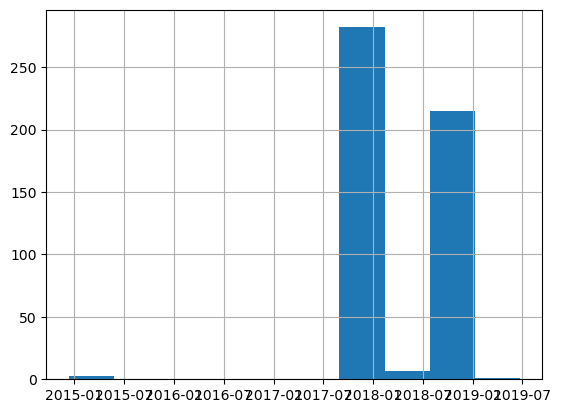

In [63]:
_ = fire_df[long_but_small]['Extinguished'].hist()

A quick visualization of the `Extinguished` dates does verify that the `Extinguished` dates likely are just filled in as January by default.

In [64]:
fire_df[long_but_small]['Extinguished'].dt.month.value_counts()

1     496
4       5
12      3
3       2
2       1
6       1
Name: Extinguished, dtype: int64

In [65]:
suspected_extinguished = fire_df[long_but_small]['Extinguished']

In [66]:
(fire_df[
    (fire_df['ActiveDays'] < 90)
    & (fire_df['ActiveDays'] > 0)
    & (fire_df['AcresBurned'] < 394)
    ]['ActiveDays']).describe()

count    422.000000
mean      12.473934
std       22.903661
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       89.000000
Name: ActiveDays, dtype: float64

In [67]:
(fire_df[
    (fire_df['ActiveDays'] < 90)
    & (fire_df['ActiveDays'] > 0)
    & (fire_df['Extinguished'].dt.month != 1)
    ]['ActiveDays']).describe()

count    563.000000
mean       7.172291
std       11.873315
min        1.000000
25%        2.000000
50%        3.000000
75%        7.000000
max       87.000000
Name: ActiveDays, dtype: float64

In [68]:
(fire_df[
    (fire_df['ActiveDays'] < 90)
    & (fire_df['ActiveDays'] > 0)
    & (fire_df['AcresBurned'] < 394)
    & (fire_df['Extinguished'].dt.month != 1)
    ]['ActiveDays']).describe()

count    361.000000
mean       4.808864
std        9.047070
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       67.000000
Name: ActiveDays, dtype: float64

January is a suspicious month, but even when excluding the suspicious month and slackening the filter on the number of acres burned--or conversely, tightening the filter--the median remains somewhat close to the same value, whereas the mean is more volatile.

In [69]:
probable_median = (fire_df[
    (fire_df['ActiveDays'] < 90)
    & (fire_df['ActiveDays'] > 0)
    & (fire_df['Extinguished'].dt.month != 1)
    ]['ActiveDays']).median()

In [70]:
# Impute only suspected_extinguished
fire_df.loc[suspected_extinguished.index, 'ActiveDays'] = probable_median
for i in suspected_extinguished.index:
    fire_df.loc[i, 'Extinguished'] = fire_df.loc[i, 'Started'] + timedelta(days=fire_df.loc[i, 'ActiveDays'])

In [71]:
fire_df['ActiveDays'].describe()

count    1605.000000
mean       24.724611
std        57.572920
min        -2.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       672.000000
Name: ActiveDays, dtype: float64

The 75% being at 7 looks a lot more reasonable than 167. Still, it is very questionable for the mean to be so much higher, and 672 days is almost 2 years long, which probably is wrong as well.

In [72]:
fire_df[fire_df['ActiveDays'] == fire_df['ActiveDays'].max()].T

,437
AcresBurned,5399.0
CalFireIncident,False
CanonicalUrl,/incidents/2016/6/20/san-gabriel-complex-forme...
Counties,Los Angeles
CountyIds,19
Extinguished,2018-04-23 15:07:00+00:00
Featured,False
Latitude,34.196398
Longitude,-118.261862
MajorIncident,False


A fire of this size surely has some information online elsewhere to cross-reference, and [there is](https://en.wikipedia.org/wiki/San_Gabriel_Complex_Fire). Glancing through other news resources and websites of status updates indicate that it was 50% contained in June, and most reports end in July, so it is likely that the Wiki page is correct, though its source, linking to a government website, cannot be verified because the page was removed.

In [73]:
fire_df.loc[437, 'ActiveDays'] = 33
fire_df.loc[437, 'Extinguished'] = fire_df.loc[437, 'Started'] + timedelta(days=fire_df.loc[437, 'ActiveDays'])

In [74]:
fire_df[fire_df['ActiveDays'] == fire_df['ActiveDays'].max()]

,AcresBurned,CalFireIncident,CanonicalUrl,Counties,CountyIds,Extinguished,Featured,Latitude,Longitude,MajorIncident,Name,Started,UniqueId,Counties List,ActiveDays
606,281893.0,True,/incidents/2017/12/4/thomas-fire/,Santa Barbara,"42,56",2019-03-14 11:24:00+00:00,False,34.41521,-119.09124,True,Thomas Fire,2017-12-04 18:28:00+00:00,d28bc34e-73a8-454d-9e55-dea7bdd40bee,"['Santa Barbara', 'Ventura']",464.0


In [75]:
fire_df.loc[606, 'ActiveDays'] = 108
fire_df.loc[606, 'Extinguished'] = fire_df.loc[606, 'Started'] + timedelta(days=fire_df.loc[606, 'ActiveDays'])

In [76]:
fire_df[fire_df['ActiveDays'] == fire_df['ActiveDays'].max()]

,AcresBurned,CalFireIncident,CanonicalUrl,Counties,CountyIds,Extinguished,Featured,Latitude,Longitude,MajorIncident,Name,Started,UniqueId,Counties List,ActiveDays
648,4016.0,True,/incidents/2017/8/29/ponderosa-fire/,Butte,4,2018-08-30 15:27:00+00:00,False,39.57701,-121.30209,False,Ponderosa Fire,2017-08-29 13:16:00+00:00,7c9253af-4c43-41bb-b1de-44af15e0d83e,['Butte'],366.0


In [77]:
fire_df.loc[648, 'ActiveDays'] = 25
fire_df.loc[648, 'Extinguished'] = fire_df.loc[648, 'Started'] + timedelta(days=fire_df.loc[648, 'ActiveDays'])

In [78]:
fire_df[(fire_df['ActiveDays'] > 160) & (fire_df['Extinguished'].dt.month != 1)]

,AcresBurned,CalFireIncident,CanonicalUrl,Counties,CountyIds,Extinguished,Featured,Latitude,Longitude,MajorIncident,Name,Started,UniqueId,Counties List,ActiveDays
439,4474.0,True,/incidents/2016/9/26/loma-fire/,Santa Clara,43,2017-09-19 10:30:00+00:00,False,37.10632,-121.85318,True,Loma Fire,2016-09-26 14:42:00+00:00,2dfac408-d2ab-4ff9-94aa-91be9d07bb59,['Santa Clara'],357.0
626,15619.0,False,/incidents/2017/12/5/creek-fire/,Los Angeles,19,2018-08-06 10:52:00+00:00,False,34.31283,-118.35863,True,Creek Fire,2017-12-05 03:44:00+00:00,a245b55b-3eb7-49dd-9a5e-909d53854055,['Los Angeles'],244.0
631,9217.0,True,/incidents/2017/10/9/canyon-2-fire/,Orange,30,2018-04-05 10:47:00+00:00,False,33.87041,-117.70975,True,Canyon 2 Fire,2017-10-09 09:51:00+00:00,969c721c-5f27-41d4-9a94-ffa12e351204,['Orange'],178.0
652,2662.0,True,/incidents/2017/9/25/canyon-fire/,Orange,30,2018-03-28 11:36:00+00:00,False,33.86680,-117.68598,False,Canyon Fire,2017-09-25 13:03:00+00:00,0176a674-c102-4854-92af-7d09aa3e1430,['Orange'],183.0
705,460.0,True,/incidents/2017/7/14/bridge-fire/,San Bernardino,36,2018-04-12 14:52:00+00:00,False,34.09773,-117.10567,False,Bridge Fire,2017-07-14 14:23:00+00:00,1348f32a-510f-4ad3-971f-b75b9cf9f0c0,['San Bernardino'],272.0


In [79]:
# Loma is 16 days
fire_df.loc[439, 'ActiveDays'] = 16
fire_df.loc[439, 'Extinguished'] = fire_df.loc[439, 'Started'] + timedelta(days=fire_df.loc[439, 'ActiveDays'])

# Creek is 35 days
fire_df.loc[626, 'ActiveDays'] = 35
fire_df.loc[626, 'Extinguished'] = fire_df.loc[626, 'Started'] + timedelta(days=fire_df.loc[626, 'ActiveDays'])

# Canyon 2 is 8 days
fire_df.loc[631, 'ActiveDays'] = 35
fire_df.loc[631, 'Extinguished'] = fire_df.loc[631, 'Started'] + timedelta(days=fire_df.loc[631, 'ActiveDays'])

In [80]:
fire_df[(fire_df['ActiveDays'] > 90) & (fire_df['Extinguished'].dt.month == 1)].shape

(148, 15)

In [81]:
fire_df[
    (fire_df['ActiveDays'] > 90)
    & (fire_df['AcresBurned'] >= 394)
    & (fire_df['AcresBurned'] < 1000)
    & (fire_df['Extinguished'].dt.month == 1)].shape

(44, 15)

In [82]:
(fire_df[
    (fire_df['ActiveDays'] <= 90)
    & (fire_df['ActiveDays'] > 0)
    & (fire_df['AcresBurned'] >= 394)
    & (fire_df['AcresBurned'] < 1000)
    & (fire_df['Extinguished'].dt.month != 1)
    ]['ActiveDays']).describe()

count    61.000000
mean      5.672131
std      10.113887
min       1.000000
25%       2.000000
50%       4.000000
75%       6.000000
max      77.000000
Name: ActiveDays, dtype: float64

In [83]:
(fire_df[
    (fire_df['ActiveDays'] > 0)
    & (fire_df['AcresBurned'] >= 394)
    & (fire_df['AcresBurned'] < 1000)
    & (fire_df['Extinguished'].dt.month != 1)
    ]['ActiveDays']).describe()

count     63.000000
mean      11.761905
std       37.780655
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max      272.000000
Name: ActiveDays, dtype: float64

In [84]:
probable_median = (fire_df[
    (fire_df['ActiveDays'] > 0)
    & (fire_df['AcresBurned'] >= 394)
    & (fire_df['AcresBurned'] < 1000)
    & (fire_df['Extinguished'].dt.month != 1)
    ]['ActiveDays']).median()

suspected_extinguished = fire_df[(fire_df['ActiveDays'] > 90)
    & (fire_df['AcresBurned'] >= 394)
    & (fire_df['AcresBurned'] < 1000)
    & (fire_df['Extinguished'].dt.month == 1)]['Extinguished']
# Impute only suspected_extinguished
fire_df.loc[suspected_extinguished.index, 'ActiveDays'] = probable_median
for i in suspected_extinguished.index:
    fire_df.loc[i, 'Extinguished'] = fire_df.loc[i, 'Started'] + timedelta(days=fire_df.loc[i, 'ActiveDays'])

# Diagnostics again
fire_df['ActiveDays'].describe()

count    1605.000000
mean       18.808723
std        45.664505
min        -2.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       318.000000
Name: ActiveDays, dtype: float64

In [85]:
fire_df[fire_df['ActiveDays'] > 90]['ActiveDays'].describe()

count    122.000000
mean     164.016393
std       41.559274
min       91.000000
25%      129.500000
50%      160.000000
75%      186.750000
max      318.000000
Name: ActiveDays, dtype: float64

In [86]:
fire_df[fire_df['ActiveDays'] > 90]['Extinguished'].dt.month.value_counts()

1     104
2      10
11      4
3       2
12      1
4       1
Name: Extinguished, dtype: int64

In [87]:
#fire_df[
#    (fire_df['ActiveDays'] > 90)
#    & (fire_df['Extinguished'].dt.month == 1)
#    & (fire_df['AcresBurned'] < 400000)
#].sort_values(by='AcresBurned', ascending=False)[:10]

In [88]:
def fix_fire_days(index, active_days):
    """
    Given an index, this sets the value of this feature to active_days, and then the Extinguished date will be set by
    adding the number of active_days to the Started date. This is meant to be used for fire_df.
    
    index - The index of the fire to change.
    active_days - Number of days the wildfire is considered active.
    """
    fire_df.loc[index, 'ActiveDays'] = active_days
    fire_df.loc[index, 'Extinguished'] = fire_df.loc[index, 'Started'] + timedelta(days=fire_df.loc[index, 'ActiveDays'])

In [89]:
idx_days = {1040:38, 1043:37, 1044:18, 607:14, 608:20, 609:46, 610:56, 613:6, 1045:36, 1046:31}

for i,days in idx_days.items():
    fix_fire_days(i, days)

In [90]:
fire_df[
    (fire_df['ActiveDays'] > 90)
    & (fire_df['Extinguished'].dt.month != 1)
    & (fire_df['AcresBurned'] < 400000)
].sort_values(by='AcresBurned', ascending=False).describe()

,AcresBurned,Latitude,Longitude,ActiveDays
count,18.000000,18.000000,18.000000,18.000000
mean,38027.166667,38.409550,-121.369261,131.666667
std,70970.330092,2.332632,2.027879,39.892503
min,460.000000,33.866800,-124.003614,99.000000
25%,3338.000000,37.775537,-122.765107,119.250000
50%,7963.000000,38.889680,-121.886665,123.000000
75%,36736.000000,39.376407,-120.216626,123.000000
max,281893.000000,41.763958,-117.105670,272.000000


In [91]:
#fire_df[
#    (fire_df['ActiveDays'] > 90)
#    & (fire_df['Extinguished'].dt.month != 1)
#    & (fire_df['AcresBurned'] < 400000)
#][['Name', 'Started', 'AcresBurned', 'ActiveDays', 'Counties', 'Extinguished']].sort_values(by='Started')

In [92]:
idx_days = {169:32, 173:45, 272:124, 281:60, 445:117, 705:4, 652:8, 633:27, 615:23, 612:19, 611:22, 630:11, 617:18, 658:17,
            689:14, 639:11, 624:22, 606:39}

for i,days in idx_days.items():
    fix_fire_days(i, days)

In [93]:
#fire_df[
#    (fire_df['ActiveDays'] > 90)
#    & (fire_df['Extinguished'].dt.month != 1)
#    & (fire_df['AcresBurned'] < 40000)
#].sort_values(by='AcresBurned', ascending=False)

In [94]:
#fire_df[
#    (fire_df['ActiveDays'] > 90)
#    & (fire_df['Extinguished'].dt.month == 1)
#    & (fire_df['AcresBurned'] < 40000)
#].sort_values(by='AcresBurned', ascending=False)

In [95]:
fire_df[
    (fire_df['ActiveDays'] > 90)
    & (fire_df['Extinguished'].dt.month == 1)
    & (fire_df['AcresBurned'] < 40000)
].describe()

,AcresBurned,Latitude,Longitude,ActiveDays
count,92.000000,92.000000,92.000000,92.000000
mean,7184.913043,37.397777,-120.101387,170.336957
std,9699.703817,2.463967,1.858557,41.332284
min,1000.000000,32.655970,-123.688056,91.000000
25%,1583.000000,35.585030,-121.058895,139.250000
50%,2532.500000,37.149330,-120.103416,162.000000
75%,7319.750000,39.502585,-118.771049,194.500000
max,39715.000000,42.039000,-116.002239,318.000000


In [96]:
fire_df[(fire_df['Extinguished'].dt.month != 1)
    & (fire_df['AcresBurned'] > 394)
].describe()

,AcresBurned,Latitude,Longitude,ActiveDays
count,291.000000,291.000000,291.000000,291.000000
mean,12203.512027,37.420576,-120.262716,11.773196
std,29947.077916,2.610280,1.918742,16.993410
min,395.000000,32.575556,-124.003614,0.000000
25%,648.000000,35.258760,-121.604189,4.000000
50%,1806.000000,37.536069,-120.439300,5.000000
75%,6972.500000,39.487380,-118.771344,14.000000
max,257314.000000,42.048000,-116.002239,124.000000


In [97]:
#fire_df[
#    (fire_df['ActiveDays'] > 90)
#    & (fire_df['Extinguished'].dt.month == 1)
#    & (fire_df['AcresBurned'] < 40000)
#][['Name', 'Started', 'AcresBurned', 'ActiveDays', 'Counties', 'Extinguished']].sort_values(by='Started').head(20)

In [98]:
idx_days = {643:1,673:2,662:1,629:3,659:2,671:3,669:4,670:8,625:11,638:4,667:2,676:2,668:3,666:1,657:8,618:12,642:27,
            623:89,661:1,665:13,678:1,675:2,619:79,646:18,672:10,656:1,644:92,634:61,655:26,635:11,681:2,650:69,645:16,
            679:3,614:77,637:78,616:26,628:17,641:3,632:13,622:19,620:50,636:7,674:5,649:7,680:10,663:47,653:56,627:23,
            621:64,660:23,1074:7,1084:5,1076:1,1085:2,1081:4,1083:8,1066:3,1070:13,1060:33,1057:4,1080:2,1062:11,1053:15,
            1055:13,1049:16,1082:6,1068:15,1073:7,1054:15,1052:10,1086:3,1050:62,1067:2,1071:2,1051:39,1058:18,1075:14,1072:4,
            1048:17,1063:14,1088:10,1087:13,1077:13,1069:7,1064:8}
for i,days in idx_days.items():
    fix_fire_days(i, days)

In [99]:
fire_df[(fire_df['Extinguished'].dt.month != 1)]['ActiveDays'].describe()

count    1516.000000
mean        5.421504
std        11.297351
min        -2.000000
25%         1.000000
50%         3.000000
75%         4.000000
max       124.000000
Name: ActiveDays, dtype: float64

In [100]:
bad_idx = fire_df[
    (fire_df['ActiveDays'] > 90)
    & (fire_df['Extinguished'].dt.month == 1)
    & (fire_df['AcresBurned'] < 40000)].index

mean_days = fire_df[(fire_df['Extinguished'].dt.month != 1) & (fire_df['AcresBurned'] < 40000)]['ActiveDays'].mean()

for i in bad_idx:
    fix_fire_days(i, mean_days)

In [101]:
fire_df['ActiveDays'].describe()

count    1605.000000
mean        8.043064
std        17.389540
min        -2.000000
25%         1.000000
50%         3.000000
75%         4.000000
max       160.000000
Name: ActiveDays, dtype: float64

In [102]:
#fire_df[(fire_df['ActiveDays'] > 8)
#    & (fire_df['Extinguished'].dt.month == 1)
#    & (fire_df['AcresBurned'] > 300)
#][['Name', 'Started', 'AcresBurned', 'ActiveDays', 'Counties', 'Extinguished']].sort_values(by='Started').head(20)

In [103]:
idx_days = {181:8,709:39,716:13,677:2,687:6,718:3,626:24,640:10,710:11,647:9,1039:21,1047:34,1061:1,1059:1,1101:13,1079:2,
           1042:14}
for i,days in idx_days.items():
    fix_fire_days(i, days)

In [104]:
#fire_df[(fire_df['ActiveDays'] > 8)
#    & (fire_df['Extinguished'].dt.month == 1)
#    & (fire_df['AcresBurned'] <= 300)]

In [105]:
#fire_df[(fire_df['ActiveDays'] > 8)
#    & (fire_df['Extinguished'].dt.month != 1)
#    & (fire_df['AcresBurned'] <= 300)]

Just quickly imputing negative days.

In [106]:
fire_df[fire_df['ActiveDays'] < 0].describe()

,AcresBurned,Latitude,Longitude,ActiveDays
count,26.000000,26.000000,26.000000,26.000000
mean,51.923077,38.091947,-120.867674,-1.153846
std,78.054813,2.323437,1.852182,0.367946
min,10.000000,33.463991,-123.437500,-2.000000
25%,19.250000,36.868841,-122.030663,-1.000000
50%,25.000000,38.907525,-121.346845,-1.000000
75%,36.750000,39.308363,-120.875120,-1.000000
max,360.000000,41.706111,-116.914799,-1.000000


In [107]:
bad_idx = fire_df[(fire_df['ActiveDays'] < 0)].index
for i in bad_idx:
    fix_fire_days(i, fire_df['ActiveDays'].median())

There are still a lot of high active days from fires in October, November, and December, so these will be more aggressively imputed

In [108]:
bad_idx = fire_df[(fire_df['ActiveDays'] > 3)
    & (fire_df['Extinguished'].dt.month == 1)
    & (fire_df['AcresBurned'] <= 300)].index

for i in bad_idx:
    fix_fire_days(i, fire_df['ActiveDays'].median())

In [109]:
fire_df['ActiveDays'].describe()

count    1605.000000
mean        5.480447
std        11.077671
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max       124.000000
Name: ActiveDays, dtype: float64

##### 5.1.3.2 Adding year and month columns

The `Started` date will be split into additional year and month columns.

In [110]:
fire_df['StartedMonth'] = fire_df['Started'].dt.month

In [111]:
fire_df['StartedYear'] = fire_df['Started'].dt.year

Some columns will be renamed for improved clarity.

In [112]:
new_fire_col_names = {'Counties':'County',
                      'Extinguished':'ExtinguishedTimestamp',
                      'Started':'StartedTimestamp',
                      'Counties List':'CountiesList'}
fire_df.rename(columns=new_fire_col_names, inplace=True)

In [113]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   AcresBurned            1603 non-null   float64            
 1   CalFireIncident        1605 non-null   bool               
 2   CanonicalUrl           1605 non-null   object             
 3   County                 1605 non-null   object             
 4   CountyIds              1605 non-null   object             
 5   ExtinguishedTimestamp  1605 non-null   datetime64[ns, UTC]
 6   Featured               1605 non-null   bool               
 7   Latitude               1605 non-null   float64            
 8   Longitude              1605 non-null   float64            
 9   MajorIncident          1605 non-null   bool               
 10  Name                   1605 non-null   object             
 11  StartedTimestamp       1605 non-null   datetime64[ns, UT

### 5.2 Climate Data

Counties will be added to `climate_df`.

In [114]:
station_counties = stations_df.loc[:,['StationNbr','County']]

In [115]:
climate_df = climate_df.merge(station_counties, left_on='Stn Id', right_on='StationNbr')

In [116]:
climate_df.head()

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),...,Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Target,StationNbr,County
0,2,FivePoints,San Joaquin Valley,2018-01-01,0.06,0.00,219.0,7.3,63.4,35.3,...,82.0,46.0,65.0,36.6,3.3,78.3,51.1,0,2,Fresno
1,2,FivePoints,San Joaquin Valley,2018-01-02,0.04,0.00,127.0,7.4,59.8,37.7,...,80.0,52.0,67.0,36.7,3.1,74.5,51.3,0,2,Fresno
2,2,FivePoints,San Joaquin Valley,2018-01-03,0.04,0.00,125.0,8.4,61.1,37.3,...,79.0,49.0,68.0,39.9,4.5,107.5,51.3,0,2,Fresno
3,2,FivePoints,San Joaquin Valley,2018-01-04,0.07,0.01,219.0,11.6,69.2,48.7,...,94.0,52.0,74.0,48.5,5.8,140.2,53.0,0,2,Fresno
4,2,FivePoints,San Joaquin Valley,2018-01-05,0.07,0.00,239.0,12.7,73.8,47.5,...,94.0,49.0,72.0,50.8,4.2,101.4,54.4,0,2,Fresno


In [117]:
climate_df['Date'] = pd.to_datetime(climate_df['Date'], format='%Y/%m/%d')

We should not need 'Target' as that is used to access the website API.

In [118]:
climate_df.drop(['StationNbr', 'Target'], inplace=True, axis=1)

In [119]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128125 entries, 0 to 128124
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Stn Id                128125 non-null  int64         
 1   Stn Name              128125 non-null  object        
 2   CIMIS Region          128125 non-null  object        
 3   Date                  128125 non-null  datetime64[ns]
 4   ETo (in)              128042 non-null  float64       
 5   Precip (in)           128125 non-null  float64       
 6   Sol Rad (Ly/day)      128125 non-null  float64       
 7   Avg Vap Pres (mBars)  128125 non-null  float64       
 8   Max Air Temp (F)      128122 non-null  float64       
 9   Min Air Temp (F)      128124 non-null  float64       
 10  Avg Air Temp (F)      128120 non-null  float64       
 11  Max Rel Hum (%)       128125 non-null  float64       
 12  Min Rel Hum (%)       128125 non-null  float64       
 13 

In [120]:
gen_na_table(climate_df)

,count,%
ETo (in),83,0.064780
Avg Soil Temp (F),20,0.015610
Dew Point (F),13,0.010146
Avg Rel Hum (%),13,0.010146
Avg Air Temp (F),5,0.003902
Max Air Temp (F),3,0.002341
Min Air Temp (F),1,0.000780
Max Rel Hum (%),0,0.000000
Wind Run (miles),0,0.000000
Avg Wind Speed (mph),0,0.000000


Most of the data is present. `ETo (in)`, `Avg Soil Temp (F)`, `Dew Point (F)`, `Avg Rel Hum (%)`, `Avg Air Temp (F)`, `Max Air Temp (F)`, and `Min Air Temp (F)` are not.

#### 5.2.1 Missing ETo

In [121]:
climate_df[climate_df['ETo (in)'].isna()].describe()

,Stn Id,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
count,83.000000,0.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,162.927711,NaN,0.000361,432.192771,12.120482,88.893976,55.686747,70.795181,74.602410,29.518072,51.132530,47.580723,3.403614,81.742169,72.906024
std,50.398844,NaN,0.001878,81.392673,4.356513,11.134810,6.405100,8.270266,24.929628,20.587921,26.342848,11.948083,1.553552,37.350764,6.491220
min,86.000000,NaN,0.000000,260.000000,3.900000,63.400000,40.600000,55.300000,25.000000,5.000000,12.000000,20.900000,1.000000,23.100000,63.000000
25%,135.000000,NaN,0.000000,379.500000,7.350000,82.800000,50.950000,66.000000,48.500000,10.500000,24.000000,36.600000,2.400000,56.600000,69.550000
50%,159.000000,NaN,0.000000,428.000000,14.200000,90.500000,55.300000,70.600000,84.000000,28.000000,56.000000,53.900000,2.900000,68.800000,71.400000
75%,210.000000,NaN,0.000000,492.500000,15.300000,94.200000,60.300000,75.100000,99.000000,40.000000,71.000000,56.000000,4.100000,98.150000,74.600000
max,233.000000,NaN,0.010000,585.000000,17.500000,110.500000,69.000000,89.500000,100.000000,78.000000,96.000000,59.800000,10.200000,244.000000,91.900000


Most of the missing values probably come from a select number of stations.

In [122]:
climate_df[climate_df['ETo (in)'].isna()]['Stn Id'].value_counts()

86     7
159    7
111    7
135    7
139    7
155    7
183    7
189    7
231    7
232    7
233    7
92     6
Name: Stn Id, dtype: int64

Since climate changes with the season, the average ETo in a month is probably a decent enough approximation for the missing values. The months that have missing values can be found.

In [123]:
climate_df[climate_df['ETo (in)'].isna()]['Date'].value_counts()

2020-09-12    12
2020-09-13    12
2020-09-14    12
2020-09-15    12
2020-09-16    12
2020-09-17    12
2020-09-18    11
Name: Date, dtype: int64

Unfortunately, some stations don't have any other September values, so instead we will impute these with values from stations in the same county.

In [124]:
na_eto_stnids = climate_df[climate_df['ETo (in)'].isna()]['Stn Id'].unique()
na_id_eto_means = {}

# Get September average ETo for these stations
for stnid in na_eto_stnids:
    stn_sept_mean = climate_df[(climate_df['Stn Id'] == stnid) & (climate_df['Date'].dt.month == 9)]['ETo (in)'].mean()
    if (~np.isnan(stn_sept_mean)):
        na_id_eto_means[stnid] = stn_sept_mean

print(na_id_eto_means)

na_eto_counties = climate_df[climate_df['ETo (in)'].isna()]['County'].unique()
na_c_eto_means = {}

# Get September average ETo for these counties
for c in na_eto_counties:
    cnty_sept_mean = climate_df[(climate_df['County'] == c) & (climate_df['Date'].dt.month == 9)]['ETo (in)'].mean()
    if (~np.isnan(cnty_sept_mean)):
        na_c_eto_means[c] = cnty_sept_mean

print(na_c_eto_means)

{86: 0.19466666666666668, 159: 0.17466666666666666}
{'Tulare': 0.18044280442804425, 'Los Angeles': 0.19149631190727084, 'Merced': 0.183312101910828, 'Santa Cruz': 0.1350735294117647, 'Riverside': 0.21875453446191054, 'Solano': 0.18930817610062892, 'Yolo': 0.18649999999999997, 'Inyo': 0.18485981308411217, 'Santa Barbara': 0.18000000000000002, 'San Bernardino': 0.2144782608695652}


In [125]:
for stnid,mean_eto in na_id_eto_means.items():
    indices = climate_df[(climate_df['ETo (in)'].isna()) & (climate_df['Stn Id'] == stnid)].index
    for i in indices:
        climate_df.loc[i, 'ETo (in)'] = mean_eto

In [126]:
for c,mean_eto in na_c_eto_means.items():
    indices = climate_df[(climate_df['ETo (in)'].isna()) & (climate_df['County'] == c)].index
    for i in indices:
        climate_df.loc[i, 'ETo (in)'] = mean_eto

In [127]:
np.sum(climate_df['ETo (in)'].isna())

0

#### 5.2.2 Missing Avg Soil Temp

In [128]:
climate_df[climate_df['Avg Soil Temp (F)'].isna()]['Stn Id'].value_counts()

64     7
151    7
234    6
Name: Stn Id, dtype: int64

In [129]:
climate_df[climate_df['Avg Soil Temp (F)'].isna()]['Date'].value_counts()

2020-09-13    3
2020-09-14    3
2020-09-15    3
2020-09-16    3
2020-09-17    3
2020-09-18    3
2020-09-12    2
Name: Date, dtype: int64

September of 2020 is truly an unfortunate month. Interestingly, the stations aren't the same ones that had issues before, so it does make one wonder what happened in that month.

In [130]:
def get_na_key_means_dict(key_col_name, value_col_name, month, df=climate_df):
    """
    Generates a dictionary containing the mean of a value_col_name, filtering for an identifying attribute and the month.
    It is meant to be used for the climate_df.
    
    key_col_name - The name of the column corresponding to the identifying quality to select for.
    value_col_name - The name of the column corresponding to the feature to impute the mean of. It should have nan values.
    month - The month to select for.
    df - The DataFrame. Unless there is a 'Date' datetime column, it will likely return a KeyError.
    """
    key_names = df[df[value_col_name].isna()][key_col_name].unique()
    na_means = {}
    
    for k in key_names:
        mean = df[(df[key_col_name] == k) & (df['Date'].dt.month == month)][value_col_name].mean()
        if (~np.isnan(mean)):
            na_means[k] = mean
    return na_means

In [131]:
na_id_avgsoiltemp = get_na_key_means_dict('Stn Id', 'Avg Soil Temp (F)', 9, df=climate_df)
na_id_avgsoiltemp

{64: 79.19491525423729, 151: 81.99166666666666, 234: 69.12162162162163}

Luckily, no stations are all empty for their September average soil temperature.

In [132]:
def impute_dict(na_dict, key_col_name, value_col_name, df=climate_df):
    """
    Given a dictionary of keys that correspond to a category in the DataFrame key_col_name and of values corresponding to
    the mean (though any value technically works), this will populate the DataFrame df with the dictionary's values. The
    intention is to fill na values.
    
    na_dict - The dictionary of categories and values. The keys should be categories that exist in the df's value_col_name,
              and the values will fill the df at these qualifying categories.
    key_col_name - The name of the column corresponding to the identifying quality to select for.
    value_col_name - The name of the column corresponding to the feature to fill. It should have nan values.
    df - The DataFrame to fill.
    """
    for k,mean in na_dict.items():
        indices = df[(df[value_col_name].isna()) & (df[key_col_name] == k)].index
        for i in indices:
            df.loc[i, value_col_name] = mean

In [133]:
impute_dict(na_id_avgsoiltemp, 'Stn Id', 'Avg Soil Temp (F)', df=climate_df)
np.sum(climate_df['Avg Soil Temp (F)'].isna())

0

#### 5.2.3 Missing Dew Point

In [134]:
climate_df[climate_df['Dew Point (F)'].isna()]['Stn Id'].value_counts()

253    7
245    3
75     1
147    1
259    1
Name: Stn Id, dtype: int64

In [135]:
climate_df[climate_df['Dew Point (F)'].isna()]['Date'].value_counts()

2020-09-17    4
2020-09-16    3
2020-09-18    2
2020-09-12    1
2020-09-13    1
2020-09-14    1
2020-09-15    1
Name: Date, dtype: int64

September 2020 makes another appearance.

In [136]:
na_id_dewpoint = get_na_key_means_dict('Stn Id', 'Dew Point (F)', 9, df=climate_df)
na_id_dewpoint

{75: 58.64487179487178,
 147: 58.99871794871795,
 245: 56.884000000000015,
 253: 54.350724637681154,
 259: 56.26326530612245}

It is fortunate again. Most likely the rest will not have to be approximated with county because there are relatively few missing values for the rest.

In [137]:
impute_dict(na_id_dewpoint, 'Stn Id', 'Dew Point (F)', df=climate_df)
np.sum(climate_df['Dew Point (F)'].isna())

0

#### 5.2.4 Missing Avg Rel Hum

In [138]:
climate_df[climate_df['Avg Rel Hum (%)'].isna()]['Stn Id'].value_counts()

253    7
245    3
75     1
147    1
259    1
Name: Stn Id, dtype: int64

These are the same stations as last time, which is not too surprising because they both have 13 missing values. The dates are probably the same too.

In [139]:
climate_df[climate_df['Avg Rel Hum (%)'].isna()]['Date'].value_counts()

2020-09-17    4
2020-09-16    3
2020-09-18    2
2020-09-12    1
2020-09-13    1
2020-09-14    1
2020-09-15    1
Name: Date, dtype: int64

In [140]:
na_id_relhum = get_na_key_means_dict('Stn Id', 'Avg Rel Hum (%)', 9, df=climate_df)
na_id_relhum

{75: 66.82051282051282,
 147: 68.65384615384616,
 245: 65.10666666666667,
 253: 82.2463768115942,
 259: 91.6938775510204}

In [141]:
impute_dict(na_id_relhum, 'Stn Id', 'Avg Rel Hum (%)', df=climate_df)
np.sum(climate_df['Avg Rel Hum (%)'].isna())

0

#### 5.2.5 Missing Air Temp

The last three, the Avg Air Temp (F), Max Air Temp (F), and Min Air Temp (F), could probably be filled in with other methods, since they are related to one another, but there is still a question of if they are missing altogether.

In [142]:
climate_df[climate_df['Max Air Temp (F)'].isna()]['Stn Id'].value_counts()

253    3
Name: Stn Id, dtype: int64

In [143]:
climate_df[climate_df['Min Air Temp (F)'].isna()]['Stn Id'].value_counts()

253    1
Name: Stn Id, dtype: int64

In [144]:
climate_df[climate_df['Max Air Temp (F)'].isna()]['Date'].value_counts()

2020-09-16    1
2020-09-17    1
2020-09-18    1
Name: Date, dtype: int64

In [145]:
climate_df[climate_df['Min Air Temp (F)'].isna()]['Date'].value_counts()

2020-09-16    1
Name: Date, dtype: int64

At least one of these probably comes from the same row.

In [146]:
na_id_maxairtemp = get_na_key_means_dict('Stn Id', 'Max Air Temp (F)', 9, df=climate_df)
na_id_minairtemp = get_na_key_means_dict('Stn Id', 'Min Air Temp (F)', 9, df=climate_df)
print(na_id_maxairtemp)
print(na_id_minairtemp)

{253: 72.19178082191782}
{253: 51.657333333333334}


In [147]:
impute_dict(na_id_maxairtemp, 'Stn Id', 'Max Air Temp (F)', df=climate_df)
impute_dict(na_id_minairtemp, 'Stn Id', 'Min Air Temp (F)', df=climate_df)
np.sum(climate_df['Max Air Temp (F)'].isna()) + np.sum(climate_df['Min Air Temp (F)'].isna())

0

In [148]:
climate_df[climate_df['Avg Air Temp (F)'].isna()]['Stn Id'].value_counts()

253    5
Name: Stn Id, dtype: int64

In [149]:
indices = climate_df[climate_df['Avg Air Temp (F)'].isna()].index
for i in indices:
    mean = (climate_df.loc[i, 'Min Air Temp (F)'] + climate_df.loc[i, 'Max Air Temp (F)']) / 2
    climate_df.loc[i, 'Avg Air Temp (F)'] = mean

np.sum(climate_df['Avg Air Temp (F)'].isna())

0

In [150]:
gen_na_table(climate_df)

,count,%
Stn Id,0,0.0
Avg Air Temp (F),0,0.0
Avg Soil Temp (F),0,0.0
Wind Run (miles),0,0.0
Avg Wind Speed (mph),0,0.0
Dew Point (F),0,0.0
Avg Rel Hum (%),0,0.0
Min Rel Hum (%),0,0.0
Max Rel Hum (%),0,0.0
Min Air Temp (F),0,0.0


### 5.3 Month Data

In [151]:
trimmed_climate_df = climate_df.drop(columns=['Stn Id','Stn Name', 'CIMIS Region'])
trimmed_climate_df['Month'] = trimmed_climate_df['Date'].dt.month

This dataframe contains the average climate for each month for each county.

In [152]:
county_climate_avg_per_month_df = trimmed_climate_df.groupby(['County','Month']).mean()
county_climate_avg_per_month_df.head()

C:\Users\chian\AppData\Local\Temp\ipykernel_1284\2260388553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_climate_avg_per_month_df = trimmed_climate_df.groupby(['County','Month']).mean()


ETo (in)  Precip (in)  Sol Rad (Ly/day)  Avg Vap Pres (mBars)  \
County  Month                                                                  
Alameda 1      0.044315     0.082419        187.596774              9.849597   
        2      0.085357     0.082946        306.017857              8.171875   
        3      0.104552     0.105410        364.078358              9.773134   
        4      0.158346     0.056962        517.265385             11.356538   
        5      0.183961     0.050706        588.941176             12.202745   

               Max Air Temp (F)  Min Air Temp (F)  Avg Air Temp (F)  \
County  Month                                                         
Alameda 1             59.729032         40.350806         49.394355   
        2             62.270536         38.892857         49.996429   
        3             62.953731         42.761194         52.652985   
        4             68.145769         47.352308         57.134231   
        5             70.221569         50.813725         59.690980   

               Max Rel Hum (%)  Min Rel Hum (%)  Avg Rel Hum (%)  \
County  Month                                                      
Alameda 1            95.326613        60.294355        80.955645   
        2            89.906250        42.852679        65.857143   
        3            92.078358        51.003731        72.003731   
        4            90.857692        51.257692        71.023077   
        5            89.556863        52.074510        70.223529   

               Dew Point (F)  Avg Wind Speed (mph)  Wind Run (miles)  \
County  Month                                                          
Alameda 1          43.659677              2.903629         69.641129   
        2          38.446875              3.907143         93.713839   
        3          43.543284              4.132090         99.141045   
        4          47.633462              4.493846        107.848077   
        5          49.659216              5.280784        126.745098   

               Avg Soil Temp (F)  
County  Month                     
Alameda 1              50.797984  
        2              51.033929  
        3              55.007090  
        4              61.031923  
        5              65.404706

In [153]:
fire_df.head(2)

,AcresBurned,CalFireIncident,CanonicalUrl,County,CountyIds,ExtinguishedTimestamp,Featured,Latitude,Longitude,MajorIncident,Name,StartedTimestamp,UniqueId,CountiesList,ActiveDays,StartedMonth,StartedYear
0,257314.0,True,/incidents/2013/8/17/rim-fire/,Tuolumne,55,2013-09-06 18:30:00+00:00,False,37.857000,-120.086000,False,Rim Fire,2013-08-17 15:25:00+00:00,5fb18d4d-213f-4d83-a179-daaf11939e78,['Tuolumne'],20.0,8,2013
1,30274.0,True,/incidents/2013/5/30/powerhouse-fire/,Los Angeles,19,2013-06-08 18:30:00+00:00,False,34.585595,-118.423176,False,Powerhouse Fire,2013-05-30 15:28:00+00:00,bf37805e-1cc2-4208-9972-753e47874c87,['Los Angeles'],9.0,5,2013


This has the raw fires by month.

In [154]:
fires_by_month_df = fire_df.groupby('StartedMonth').agg(
    total_fires = pd.NamedAgg(column='UniqueId', aggfunc='count'),
    total_acres = pd.NamedAgg(column='AcresBurned', aggfunc='sum'),
    mean_acres = pd.NamedAgg(column='AcresBurned', aggfunc='mean'),
    median_acres = pd.NamedAgg(column='AcresBurned', aggfunc='median'),
    total_days = pd.NamedAgg(column='ActiveDays', aggfunc='sum'),
    mean_days = pd.NamedAgg(column='ActiveDays', aggfunc='mean'),
    median_days = pd.NamedAgg(column='ActiveDays', aggfunc='median')
)
fires_by_month_df

,total_fires,total_acres,mean_acres,median_acres,total_days,mean_days,median_days
StartedMonth,,,,,,,
1,10,3780.0,378.000000,113.0,27.000000,2.700000,2.0
2,9,10579.0,1175.444444,311.0,46.000000,5.111111,4.0
3,6,1201.0,200.166667,191.5,11.000000,1.833333,2.0
4,35,14767.0,421.914286,75.0,144.000000,4.114286,3.0
5,139,143312.0,1031.021583,91.0,423.016779,3.043286,3.0
6,314,343637.0,1094.385350,72.5,1237.016779,3.939544,3.0
7,404,2197374.0,5439.044554,95.5,2491.016779,6.165883,3.0
8,277,1122874.0,4053.696751,110.0,1936.033557,6.989291,3.0
9,207,394977.0,1908.101449,109.0,1314.016779,6.347907,3.0


### 5.4 County Data

In [155]:
county_df.head(2)

,county,countyId,County,Latitude,Longitude
0,Alameda,1,Alameda,37.647138,-121.912488
1,Alpine,2,Alpine,38.621783,-119.798352


#### 5.4.1 Adding per county fire data

Here are a couple of per county fire statistics: total acres burned and number of fires started in the county.

In [156]:
county_total_acres_burned = fire_df.groupby('County')['AcresBurned'].sum()
county_total_acres_burned.sort_values(ascending=False).head()

County
Colusa           459288.0
Shasta           448527.0
Siskiyou         367914.0
Santa Barbara    362568.0
Tuolumne         299132.0
Name: AcresBurned, dtype: float64

In [157]:
county_origin_of_fire = fire_df['County'].value_counts(sort=False)

In [158]:
county_df.drop(columns='county', inplace=True)

In [159]:
county_stats = pd.DataFrame(county_total_acres_burned)
county_stats.head()

,AcresBurned
County,
Alameda,6387.0
Alpine,0.0
Amador,6285.0
Butte,190702.0
Calaveras,2648.0


In [160]:
origins = pd.DataFrame(county_origin_of_fire)
origins.reset_index(inplace=True)
origins.head()

,index,County
0,Tuolumne,22
1,Los Angeles,46
2,Riverside,146
3,Placer,16
4,Ventura,26


In [161]:
origins.rename(columns={'County':'FireStartCounts','index':'County'}, inplace=True)
origins.head()

,County,FireStartCounts
0,Tuolumne,22
1,Los Angeles,46
2,Riverside,146
3,Placer,16
4,Ventura,26


In [162]:
county_stats = county_stats.merge(origins, how='left', on='County')
county_stats.head(3)

,County,AcresBurned,FireStartCounts
0,Alameda,6387.0,32
1,Alpine,0.0,2
2,Amador,6285.0,13


In [163]:
county_df = county_df.merge(county_stats, how='left', on='County')
county_df.head(3)

,countyId,County,Latitude,Longitude,AcresBurned,FireStartCounts
0,1,Alameda,37.647138,-121.912488,6387.0,32.0
1,2,Alpine,38.621783,-119.798352,0.0,2.0
2,3,Amador,38.443550,-120.653856,6285.0,13.0


In [164]:
county_df['AcresPerFireCount'] = county_df['AcresBurned'] / county_df['FireStartCounts']
county_df.head(3)

,countyId,County,Latitude,Longitude,AcresBurned,FireStartCounts,AcresPerFireCount
0,1,Alameda,37.647138,-121.912488,6387.0,32.0,199.593750
1,2,Alpine,38.621783,-119.798352,0.0,2.0,0.000000
2,3,Amador,38.443550,-120.653856,6285.0,13.0,483.461538


In [165]:
county_df.tail(4)

,countyId,County,Latitude,Longitude,AcresBurned,FireStartCounts,AcresPerFireCount
57,58,Yuba,39.27013,-121.344259,11910.0,14.0,850.714286
58,59,NaN,NaN,NaN,NaN,NaN,NaN
59,61,NaN,NaN,NaN,NaN,NaN,NaN
60,62,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
# Drop the rows that corresponded with non-California counties
county_df.drop(index=[58,59,60], inplace=True)

#### 5.4.2 Adding population, area, and density

Some more information about each county will be added--namely, the population, the area, and the density.

In [167]:
ca_county_url = 'https://simple.wikipedia.org/wiki/List_of_counties_in_California'
ca_counties = pd.read_html(ca_county_url)
len(ca_counties)

1

In [168]:
ca_counties = ca_counties[0]
ca_counties.head()

,County,FIPS code[1],County seat[2],Established[2],Formed from,Meaning of name[3],Population,Area[2],Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"Spanish for ""avenue shaded by trees"" or ""cotto...",1510271,"738 sq mi (1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada.,1175,"739 sq mi (1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",38091,"606 sq mi (1,570 km2)",NaN
3,Butte County,7,Oroville,1850,Original,"Sutter Buttes, mistakenly thought to be in the...",220000,"1,640 sq mi (4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,Original,"Calaveras River; calaveras is Spanish for ""sku...",45578,"1,020 sq mi (2,642 km2)",NaN


In [169]:
# Verify that there are 58 out of 58 counties
len(ca_counties)

58

In [170]:
ca_counties_sub = ca_counties.iloc[:, [0,6,7]].copy()
ca_counties_sub.columns = ['County','Population_2022','Area']

In [171]:
# Trimming off 'County'
ca_counties_sub = ca_counties_sub.apply(lambda x: x.replace({' County':''}, regex=True))

In [172]:
ca_counties_sub.head(2)

,County,Population_2022,Area
0,Alameda,1510271,"738 sq mi (1,911 km2)"
1,Alpine,1175,"739 sq mi (1,914 km2)"


In [173]:
# Parse area in sq miles only
ca_counties_sub['Area'] = ca_counties_sub['Area'].apply(lambda x: x.split(u'\xa0')[0])
ca_counties_sub.rename(columns={'Area':'Area_sqmi'}, inplace=True)

In [174]:
# Drop commas
ca_counties_sub['Area_sqmi'] = ca_counties_sub['Area_sqmi'].apply(lambda x: x.replace(',',''))

In [175]:
ca_counties_sub = ca_counties_sub.astype({'Area_sqmi': 'int64'})

In [176]:
ca_counties_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   County           58 non-null     object
 1   Population_2022  58 non-null     int64 
 2   Area_sqmi        58 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [177]:
ca_counties_sub['Pop_per_size'] = ca_counties_sub['Population_2022'] / ca_counties_sub['Area_sqmi']

In [178]:
ca_counties_sub.head(2)

,County,Population_2022,Area_sqmi,Pop_per_size
0,Alameda,1510271,738,2046.437669
1,Alpine,1175,739,1.589986


In [179]:
county_df = county_df.merge(ca_counties_sub, left_on='County', right_on='County', how='left')

More census data can be found for the rest of the years, but for now, a rough estimate of the population may suffice.

In [180]:
county_df.head(2)

,countyId,County,Latitude,Longitude,AcresBurned,FireStartCounts,AcresPerFireCount,Population_2022,Area_sqmi,Pop_per_size
0,1,Alameda,37.647138,-121.912488,6387.0,32.0,199.59375,1510271,738,2046.437669
1,2,Alpine,38.621783,-119.798352,0.0,2.0,0.00000,1175,739,1.589986


The `StartProportion` represents the proportion of counts of fires started per county overall (county_fcount / total_county_fcount).

In [181]:
# Proportion of counts of fire per county (county_fcount / total_county_fcount)
all_total_fires = county_df['FireStartCounts'].sum()
county_df['StartProportion'] = county_df['FireStartCounts'] / all_total_fires
county_df.head(2)

,countyId,County,Latitude,Longitude,AcresBurned,FireStartCounts,AcresPerFireCount,Population_2022,Area_sqmi,Pop_per_size,StartProportion
0,1,Alameda,37.647138,-121.912488,6387.0,32.0,199.59375,1510271,738,2046.437669,0.019938
1,2,Alpine,38.621783,-119.798352,0.0,2.0,0.00000,1175,739,1.589986,0.001246


#### 5.4.3 Month data for counties

In [182]:
# County fires by month
county_fires_by_month_df = fire_df.groupby(['County', 'StartedMonth']).agg(
    total_fires = pd.NamedAgg(column='UniqueId', aggfunc='count'),
    total_acres = pd.NamedAgg(column='AcresBurned', aggfunc='sum'),
    mean_acres = pd.NamedAgg(column='AcresBurned', aggfunc='mean'),
    median_acres = pd.NamedAgg(column='AcresBurned', aggfunc='median'),
    total_days = pd.NamedAgg(column='ActiveDays', aggfunc='sum'),
    mean_days = pd.NamedAgg(column='ActiveDays', aggfunc='mean'),
    median_days = pd.NamedAgg(column='ActiveDays', aggfunc='median')
)
county_fires_by_month_df

total_fires  total_acres   mean_acres  median_acres  \
County  StartedMonth                                                        
Alameda 5                       3        738.0   246.000000         242.0   
        6                       6        854.0   142.333333         132.0   
        7                       7        854.0   122.000000          38.0   
        8                       8       3420.0   427.500000          93.5   
        9                       3        188.0    62.666667          22.0   
...                           ...          ...          ...           ...   
Yuba    6                       4        388.0    97.000000          80.0   
        7                       4        200.0    50.000000          44.5   
        8                       3       1297.0   432.333333         400.0   
        9                       1         26.0    26.000000          26.0   
        10                      1       9989.0  9989.000000        9989.0   

                      total_days  mean_days  median_days  
County  StartedMonth                                      
Alameda 5                   10.0   3.333333          3.0  
        6                    5.0   0.833333          0.0  
        7                   11.0   1.571429          1.0  
        8                   20.0   2.500000          3.0  
        9                    6.0   2.000000          3.0  
...                          ...        ...          ...  
Yuba    6                   14.0   3.500000          3.0  
        7                    7.0   1.750000          2.0  
        8                    5.0   1.666667          1.0  
        9                    3.0   3.000000          3.0  
        10                  11.0  11.000000         11.0  

[342 rows x 7 columns]

The `month_fire_prop` represents the proportion of counts of fire per county per month (county_fcount_in_month / total_fcount_in_month).

In [183]:
fpmonth_ser = county_fires_by_month_df.groupby('StartedMonth')['total_fires'].sum()
#fpmonth_ser

In [184]:
cm_idx = county_fires_by_month_df.index
cm_fire_prop = []

for c,m in cm_idx:
    # county_fcount_in_month / total_fcount_in_month
    cm_fire_prop.append(county_fires_by_month_df.loc[(c,m)]['total_fires'] / fpmonth_ser[m])

county_fires_by_month_df['month_fire_prop'] = cm_fire_prop
county_fires_by_month_df.head(2)

total_fires  total_acres  mean_acres  median_acres  \
County  StartedMonth                                                       
Alameda 5                       3        738.0  246.000000         242.0   
        6                       6        854.0  142.333333         132.0   

                      total_days  mean_days  median_days  month_fire_prop  
County  StartedMonth                                                       
Alameda 5                   10.0   3.333333          3.0         0.021583  
        6                    5.0   0.833333          0.0         0.019108

### 5.5 Location Mapping

In [185]:
fire_df.head(3)

,AcresBurned,CalFireIncident,CanonicalUrl,County,CountyIds,ExtinguishedTimestamp,Featured,Latitude,Longitude,MajorIncident,Name,StartedTimestamp,UniqueId,CountiesList,ActiveDays,StartedMonth,StartedYear
0,257314.0,True,/incidents/2013/8/17/rim-fire/,Tuolumne,55,2013-09-06 18:30:00+00:00,False,37.857000,-120.086000,False,Rim Fire,2013-08-17 15:25:00+00:00,5fb18d4d-213f-4d83-a179-daaf11939e78,['Tuolumne'],20.0,8,2013
1,30274.0,True,/incidents/2013/5/30/powerhouse-fire/,Los Angeles,19,2013-06-08 18:30:00+00:00,False,34.585595,-118.423176,False,Powerhouse Fire,2013-05-30 15:28:00+00:00,bf37805e-1cc2-4208-9972-753e47874c87,['Los Angeles'],9.0,5,2013
2,27531.0,True,/incidents/2013/7/15/mountain-fire/,Riverside,33,2013-07-30 18:00:00+00:00,False,33.709500,-116.728850,False,Mountain Fire,2013-07-15 13:43:00+00:00,a3149fec-4d48-427c-8b2c-59e8b79d59db,['Riverside'],15.0,7,2013


A static and basic plot.

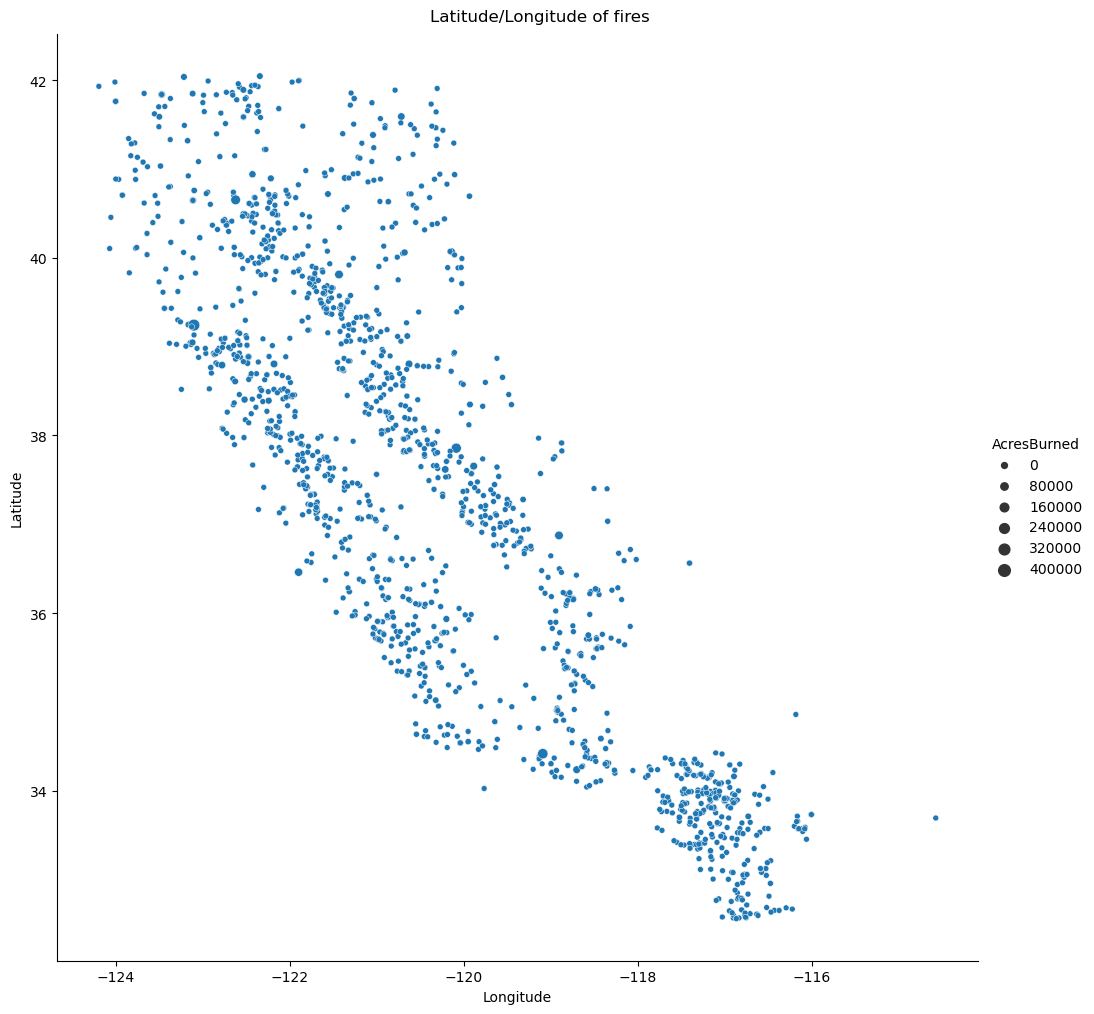

In [186]:
g = sns.relplot(data=fire_df, x='Longitude', y='Latitude', kind='scatter',
                height=10,
                size='AcresBurned')
g.fig.suptitle('Latitude/Longitude of fires', y=1.01)
plt.show()

#### 5.5.1 Heatmap by months

This will generate a heatmap using month periods.

In [187]:
dt_fire_df = fire_df.dropna()

dt_fire_df = dt_fire_df[['Latitude', 'Longitude', 'StartedTimestamp', 'AcresBurned']]

dt_fire_df.sort_values(by='StartedTimestamp', inplace=True)

# These are using Started months, but it could be more interesting if they were continuous, but Extinguished times are
# unreliable.
# mm/yy
dt_fire_df['StartedMY'] = [d.strftime('%m/%y') for d in dt_fire_df['StartedTimestamp']]
# playing with yy
#dt_fire_df['StartedMY'] = [d.strftime('%y') for d in dt_fire_df['StartedTimestamp']]
dt_fire_df.head()

,Latitude,Longitude,StartedTimestamp,AcresBurned,StartedMY
47,39.094802,-122.746757,2013-01-22 11:08:00+00:00,296.0,01/13
40,36.602575,-118.016510,2013-02-24 08:16:00+00:00,406.0,02/13
43,33.729827,-116.002239,2013-02-28 16:43:00+00:00,311.0,02/13
99,36.761006,-119.655019,2013-04-09 12:35:00+00:00,80.0,04/13
145,34.288877,-116.941311,2013-04-20 17:30:00+00:00,30.0,04/13


In [188]:
dt_fire_df['AcresBurned'].describe()

count      1603.000000
mean       3245.217717
std       18688.038062
min           0.000000
25%          35.000000
50%          97.000000
75%         393.500000
max      410203.000000
Name: AcresBurned, dtype: float64

In [189]:
# These correspond to percentiles
def categorize_by_acre(x, type_3=393, type_2=35):
    """
    Returns a float depending on a "type" of fire, which is meant to loosely group fires by the numbers of acres burned.
    
    x - The fire to judge.
    type_3 - The default is fire_df's 75% AcresBurned.
    type_2 - The default is fire_df's 25% AcresBurned.
    
    Note, the default values do not match the floating points. This is meant for quick illustrative purposes to get a
    broad idea of the fires. Feel free to use different divisions for the types.
    """
    fire_cat = {3:type_3, 2:type_2}
    if x >= fire_cat[3]:
        return 1
    elif x >= fire_cat[2]:
        return .66
    else:
        return .33

acres_burned_cat = [categorize_by_acre(x) for x in dt_fire_df['AcresBurned']]
dt_fire_df['FireType'] = acres_burned_cat

In [190]:
# Adding in the 'empty' months because the frames in the map are not evenly spaced. Many months don't have fires,
# especially cooler and wetter months, as seen below.
dt_fire_df['StartedMY'].unique()

array(['01/13', '02/13', '04/13', '05/13', '06/13', '07/13', '08/13',
       '09/13', '10/13', '11/13', '12/13', '01/14', '03/14', '04/14',
       '05/14', '06/14', '07/14', '08/14', '09/14', '10/14', '02/15',
       '04/15', '05/15', '06/15', '07/15', '08/15', '09/15', '10/15',
       '11/15', '04/16', '05/16', '06/16', '07/16', '08/16', '09/16',
       '10/16', '11/16', '02/17', '04/17', '05/17', '06/17', '07/17',
       '08/17', '09/17', '10/17', '11/17', '12/17', '01/18', '02/18',
       '03/18', '04/18', '05/18', '06/18', '07/18', '08/18', '09/18',
       '10/18', '11/18', '12/18', '01/19', '04/19', '05/19', '06/19',
       '07/19', '08/19', '09/19', '10/19', '11/19'], dtype=object)

In [191]:
import datetime

# Adding 'empty' months
mmyy_list = pd.date_range(datetime.date(fire_df['StartedTimestamp'].min().year,fire_df['StartedTimestamp'].min().month,1),
              datetime.date(fire_df['StartedTimestamp'].max().year,fire_df['StartedTimestamp'].max().month,30),
              freq='M').strftime("%m/%y").tolist()

In [192]:
lat_long_list = []

# For every unique mm/yy date
for i in mmyy_list:
    temp=[]
    # Make a list of every lat,long in this date. FireType is being used as the weight
    for index, instance in dt_fire_df[dt_fire_df['StartedMY'] == i].iterrows():
        temp.append([instance['Latitude'],instance['Longitude'],instance['FireType']])
    # Add to lat,long list
    lat_long_list.append(temp)
    
time_index = mmyy_list

In [193]:
heat_fire_map = folium.Map(location=[37.183989, -119.949401], tiles="stamenterrain", zoom_start=6)
hm = plugins.HeatMapWithTime(data=lat_long_list, index=time_index, auto_play=True)
hm.add_to(heat_fire_map)

title_html = '''
             <h1 align="center" style="font-size:16px"><b>{}</b></h1>
             '''.format('Fire Heatmap by Months')
heat_fire_map.get_root().html.add_child(folium.Element(title_html))

heat_fire_map

In [194]:
heat_fire_map.save("../reports/figures/heatmap_monthly.html")

#### 5.5.2 Heatmap by years

This will give a heatmap by year.

In [195]:
dt_fire_df = fire_df.dropna()

dt_fire_df = dt_fire_df[['Latitude', 'Longitude', 'StartedTimestamp', 'AcresBurned']]

dt_fire_df.sort_values(by='StartedTimestamp', inplace=True)

# Playing with yy
dt_fire_df['StartedMY'] = [d.strftime('%y') for d in dt_fire_df['StartedTimestamp']]
dt_fire_df.head()

acres_burned_cat = [categorize_by_acre(x) for x in dt_fire_df['AcresBurned']]
dt_fire_df['FireType'] = acres_burned_cat

In [196]:
lat_long_list = []

# For every unique mm/yy date
for i in dt_fire_df['StartedMY'].unique():
    temp=[]
    # Make a list of every lat,long in this date. FireType is being used as the weight
    for index, instance in dt_fire_df[dt_fire_df['StartedMY'] == i].iterrows():
        temp.append([instance['Latitude'],instance['Longitude'],instance['FireType']])
    # Add to lat,long list
    lat_long_list.append(temp)

In [197]:
time_index = []

# For every unique mm/yy date, add it to the time_index
for i in dt_fire_df['StartedMY'].unique():
    time_index.append(i)

In [198]:
heat_fire_map = folium.Map(location=[37.183989, -119.949401], tiles="stamenterrain", zoom_start=6)
hm = plugins.HeatMapWithTime(data=lat_long_list, index=time_index, auto_play=True)
hm.add_to(heat_fire_map)

title_html = '''
             <h1 align="center" style="font-size:16px"><b>{}</b></h1>
             '''.format('Fire Heatmap by Year')
heat_fire_map.get_root().html.add_child(folium.Element(title_html))

heat_fire_map

In [199]:
heat_fire_map.save("../reports/figures/heatmap_yearly.html")

With monthly values, the map feels a little empty; displaying a year heatmap looks better. Another consideration could be to use seasonal periods.

The year heatmap more clearly shows that there are specific areas where the wildfires more commonly occur, and these are not that surprising, considering California's biomes. The mountainous regions, particularly those with forests and chaparrals have more fires and bigger fires.

In [200]:
lat_long_ab = dt_fire_df[['Latitude','Longitude','AcresBurned']]
lat_long_ab['AcresBurnedL1Adj'] = np.log((lat_long_ab['AcresBurned'])+1)
lat_long_ab['Weight'] = lat_long_ab['AcresBurnedL1Adj'] / (lat_long_ab['AcresBurnedL1Adj'].max())

C:\Users\chian\AppData\Local\Temp\ipykernel_1284\2303201760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_long_ab['AcresBurnedL1Adj'] = np.log((lat_long_ab['AcresBurned'])+1)
C:\Users\chian\AppData\Local\Temp\ipykernel_1284\2303201760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_long_ab['Weight'] = lat_long_ab['AcresBurnedL1Adj'] / (lat_long_ab['AcresBurnedL1Adj'].max())


In [201]:
total_fire_base_map = folium.Map(location=[37.183989, -119.949401], tiles="stamenterrain", zoom_start=6)
total_fire_heat_map = plugins.HeatMap(data=lat_long_ab[['Latitude','Longitude','Weight']].values.tolist(),
                                      radius=18)
_ = total_fire_base_map.add_child(total_fire_heat_map)

In [202]:
total_fire_base_map.save("../reports/figures/heatmap_total.html")

### 5.6 Data Visualization

In [198]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   AcresBurned            1603 non-null   float64            
 1   CalFireIncident        1605 non-null   bool               
 2   CanonicalUrl           1605 non-null   object             
 3   County                 1605 non-null   object             
 4   CountyIds              1605 non-null   object             
 5   ExtinguishedTimestamp  1605 non-null   datetime64[ns, UTC]
 6   Featured               1605 non-null   bool               
 7   Latitude               1605 non-null   float64            
 8   Longitude              1605 non-null   float64            
 9   MajorIncident          1605 non-null   bool               
 10  Name                   1605 non-null   object             
 11  StartedTimestamp       1605 non-null   datetime64[ns, UT

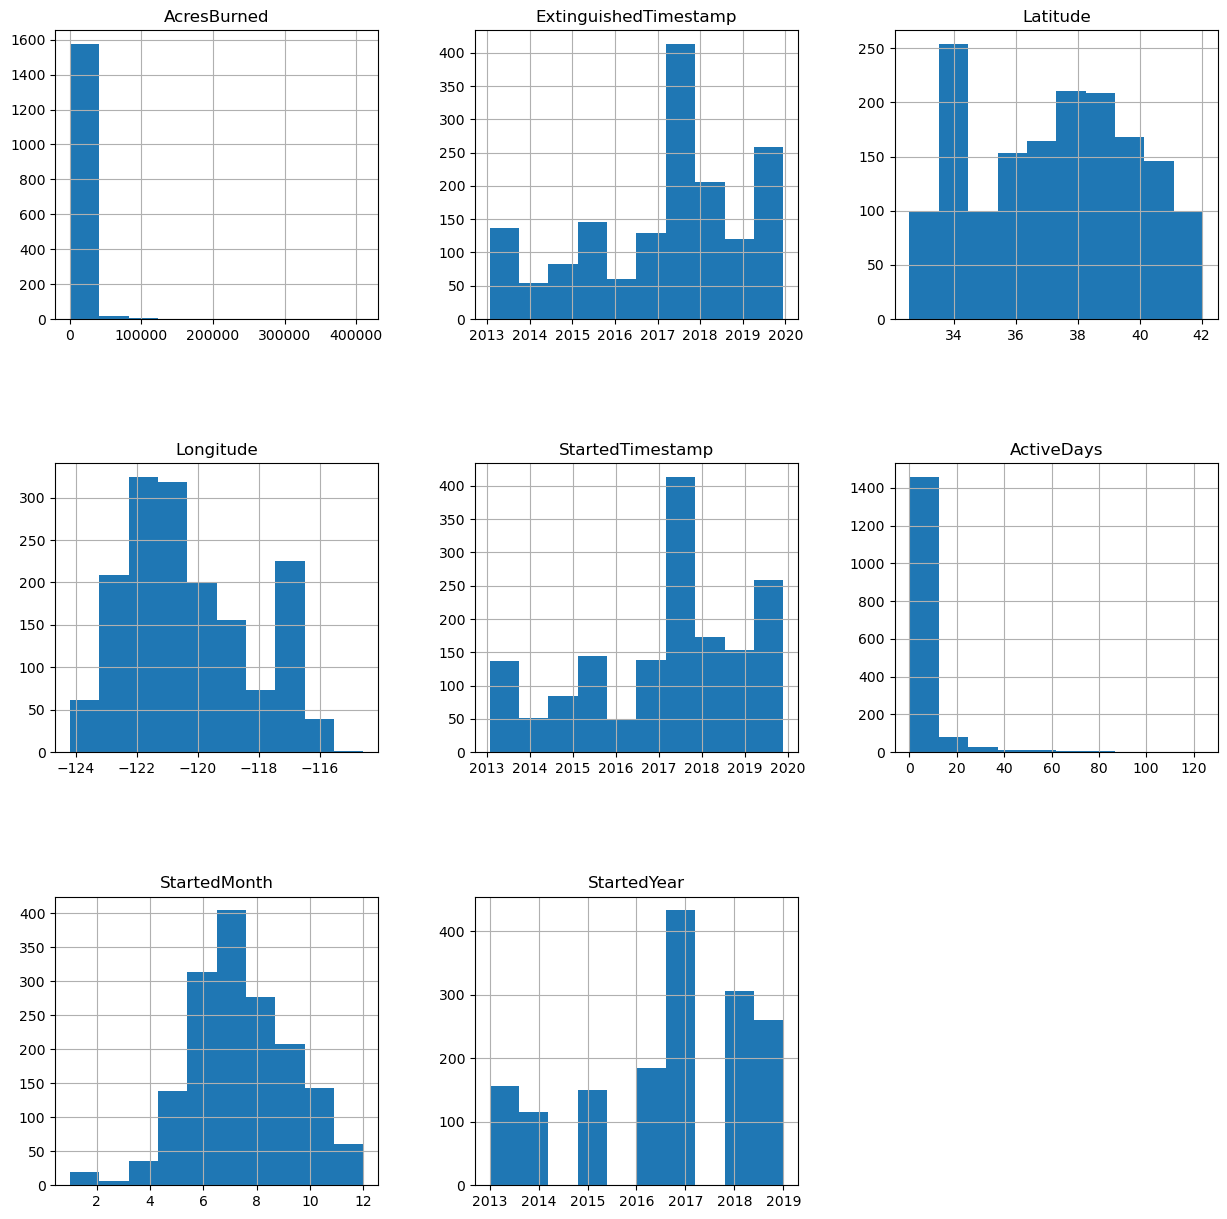

In [199]:
fire_df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

There are some extreme outliers in `AcresBurned` and `ActiveDays`. Most fires occurred in the warm months and in 2017 and 2018.

In [200]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128125 entries, 0 to 128124
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Stn Id                128125 non-null  int64         
 1   Stn Name              128125 non-null  object        
 2   CIMIS Region          128125 non-null  object        
 3   Date                  128125 non-null  datetime64[ns]
 4   ETo (in)              128125 non-null  float64       
 5   Precip (in)           128125 non-null  float64       
 6   Sol Rad (Ly/day)      128125 non-null  float64       
 7   Avg Vap Pres (mBars)  128125 non-null  float64       
 8   Max Air Temp (F)      128125 non-null  float64       
 9   Min Air Temp (F)      128125 non-null  float64       
 10  Avg Air Temp (F)      128125 non-null  float64       
 11  Max Rel Hum (%)       128125 non-null  float64       
 12  Min Rel Hum (%)       128125 non-null  float64       
 13 

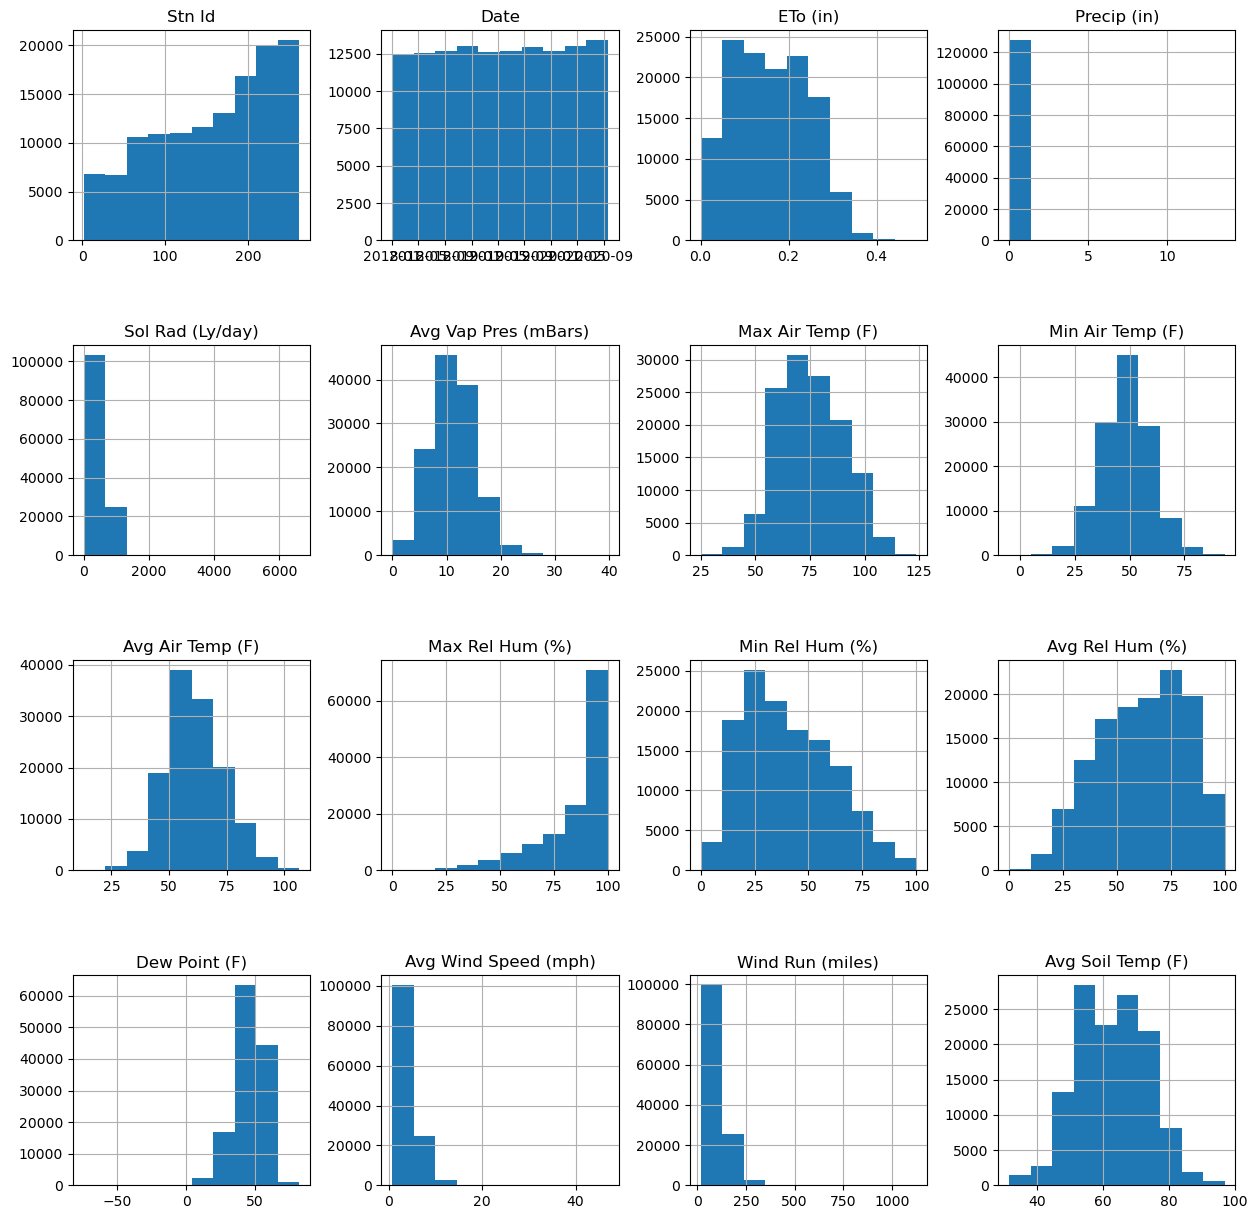

In [201]:
climate_df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

In [202]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   countyId           58 non-null     int64  
 1   County             58 non-null     object 
 2   Latitude           58 non-null     float64
 3   Longitude          58 non-null     float64
 4   AcresBurned        56 non-null     float64
 5   FireStartCounts    56 non-null     float64
 6   AcresPerFireCount  56 non-null     float64
 7   Population_2022    58 non-null     int64  
 8   Area_sqmi          58 non-null     int64  
 9   Pop_per_size       58 non-null     float64
 10  StartProportion    56 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.4+ KB


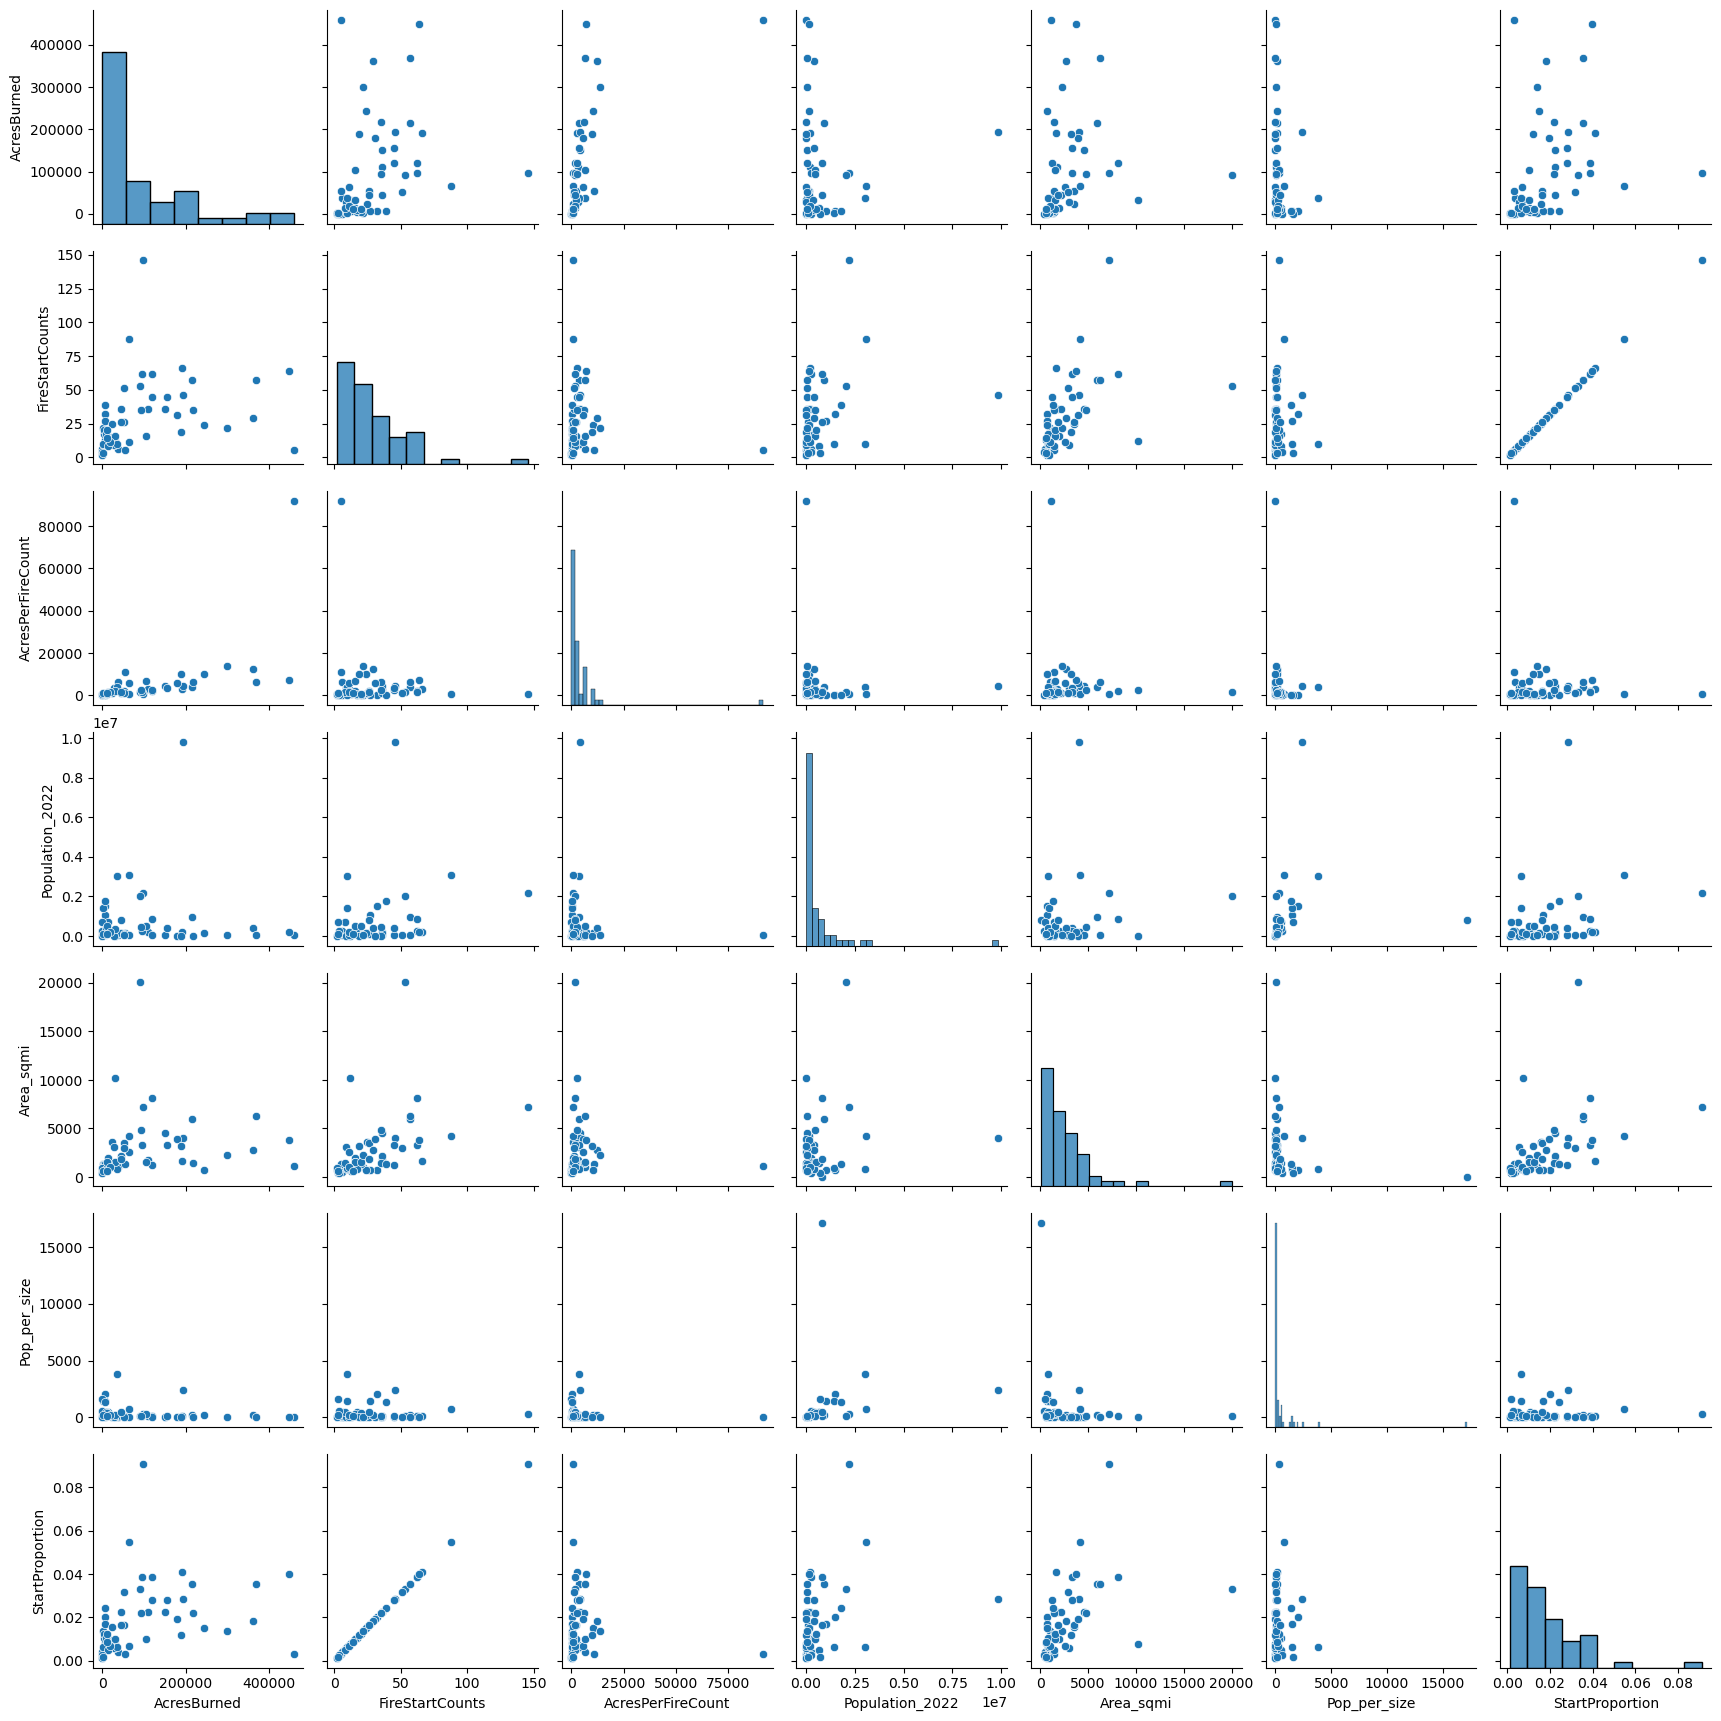

In [203]:
_ = sns.pairplot(county_df[['AcresBurned','FireStartCounts','AcresPerFireCount',
                            'Population_2022','Area_sqmi','Pop_per_size', 'StartProportion']])

The number and size of a fire tend to be slightly higher with the size of a county. Counties with lower populations tend to have larger and more numerous fires, but perhaps not as strongly.

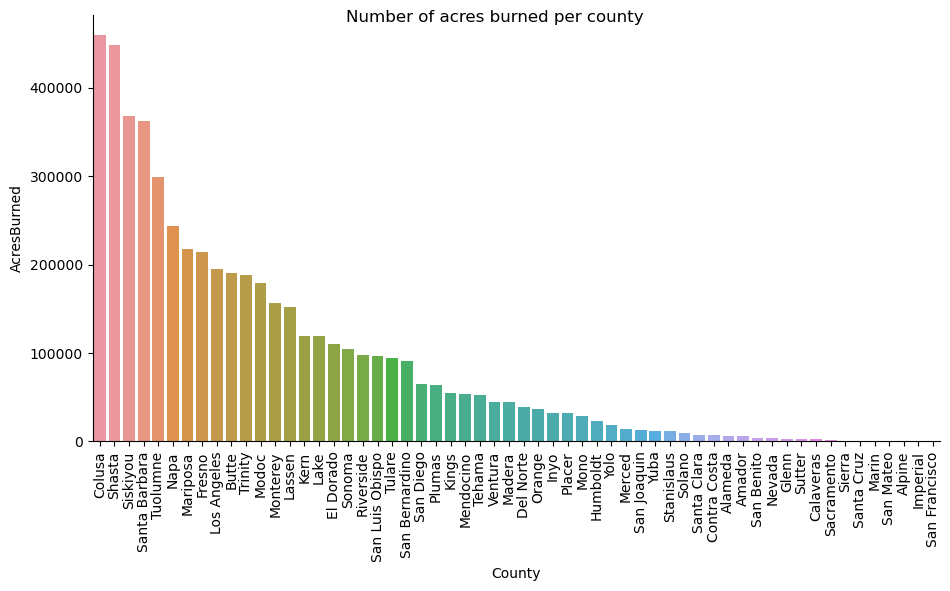

In [204]:
g = sns.catplot(x='County', y='AcresBurned', data=county_df, kind='bar', height=5, aspect=2,
               order=county_df.sort_values(by='AcresBurned', ascending=False).County)
_ = plt.xticks(rotation=90)
g.fig.suptitle('Number of acres burned per county')
plt.show()

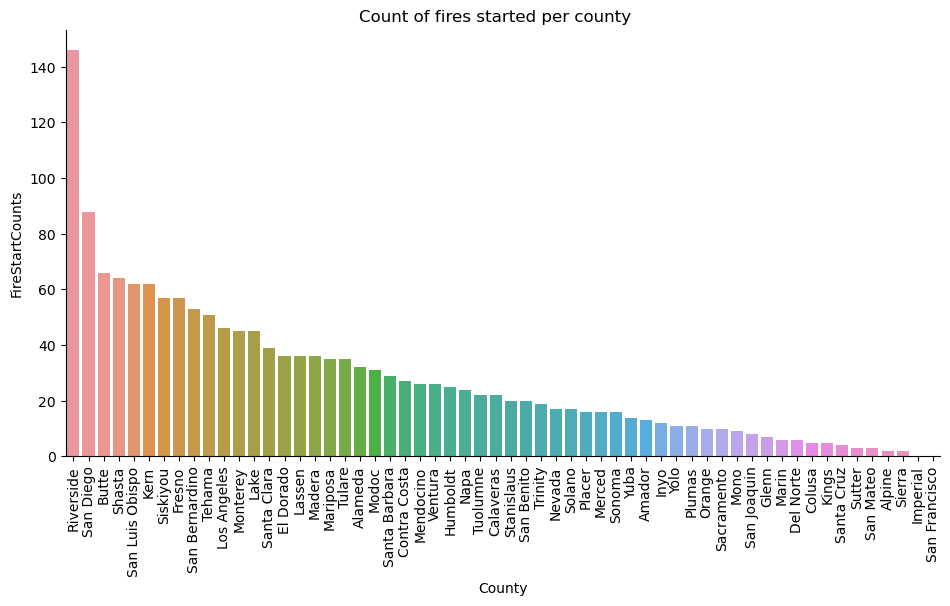

In [205]:
g = sns.catplot(x='County', y='FireStartCounts', data=county_df, kind='bar', height=5, aspect=2,
               order=county_df.sort_values(by='FireStartCounts', ascending=False).County)
g.fig.suptitle('Count of fires started per county', y=1.01)
_ = plt.xticks(rotation=90)
plt.show()

Counties with higher acres burned seem to be in larger counties that contain a lot of forest and mountain regions. Shasta is the only county that appears in the top few counties for both acres and number of fires. Two southern Californian counties have the most fires started. Perhaps the environments and accessibility of Riverside and San Diego cause there to be more numerous yet less intense fires; shrubs and brushes grow and replenish quickly, these are relatively warmer and sunnier areas, and there are a lot of pockets of civilization. The data we have seems insufficient to help explain fires well. Fuel type is extremely important, but this information is not included. Beyond fuel type, there are many reasons that fires could start in the first place, that are somewhat independent of natural characteristics like location and climate, such as a vehicular accident.

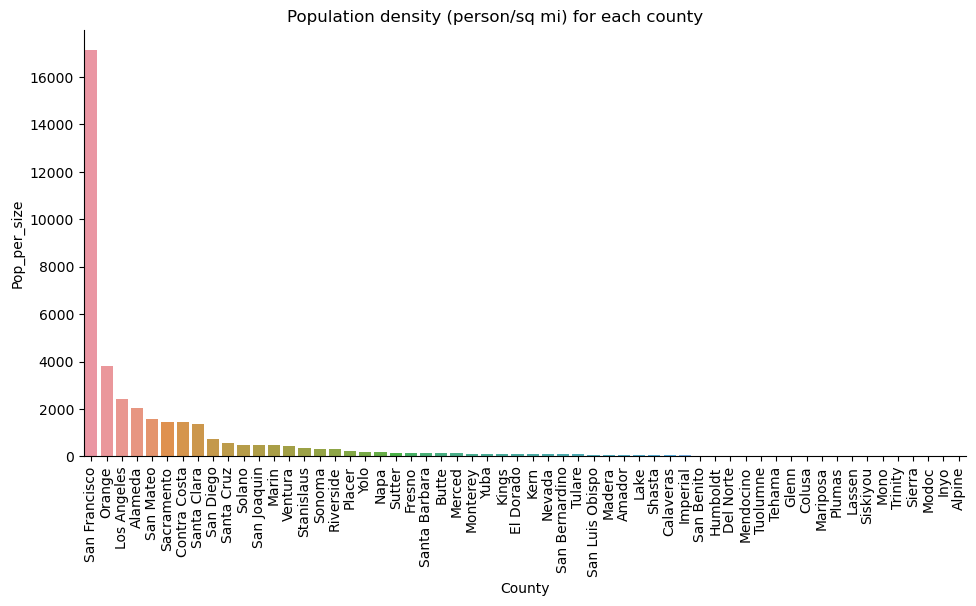

In [206]:
g = sns.catplot(x='County', y='Pop_per_size', data=county_df, kind='bar', height=5, aspect=2,
                order=county_df.sort_values(by='Pop_per_size', ascending=False).County)
g.fig.suptitle('Population density (person/sq mi) for each county', y=1.01)
_ = plt.xticks(rotation=90)
plt.show()

In [207]:
fires_by_month_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_fires   12 non-null     int64  
 1   total_acres   12 non-null     float64
 2   mean_acres    12 non-null     float64
 3   median_acres  12 non-null     float64
 4   total_days    12 non-null     float64
 5   mean_days     12 non-null     float64
 6   median_days   12 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 768.0 bytes


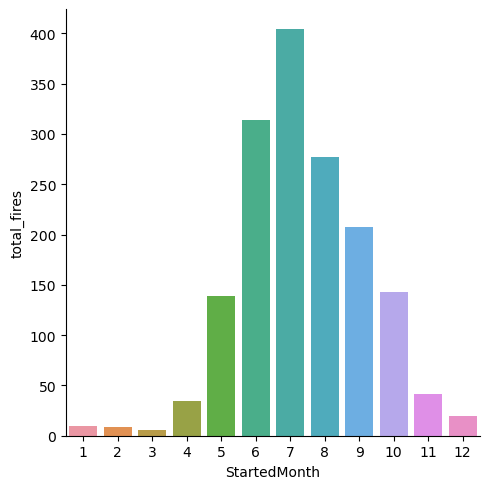

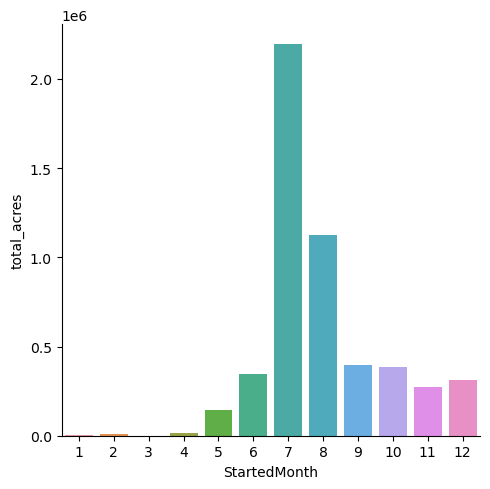

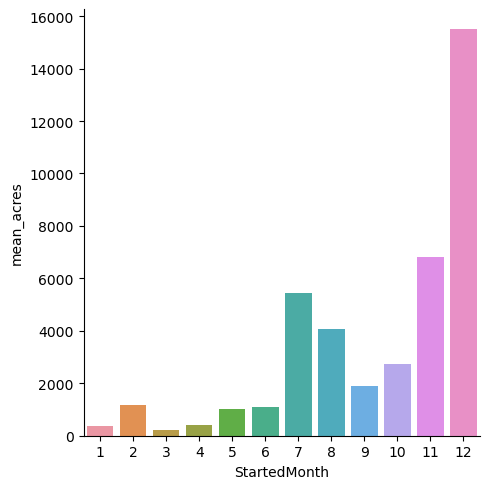

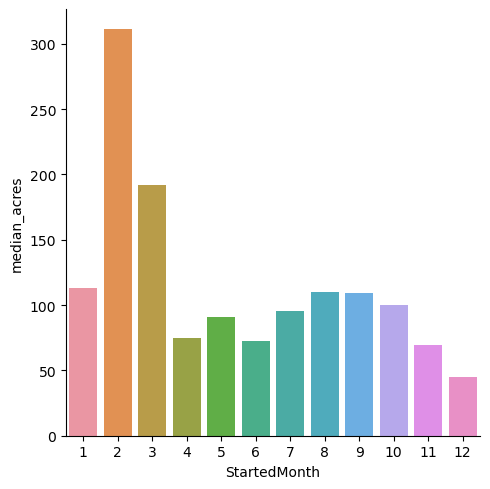

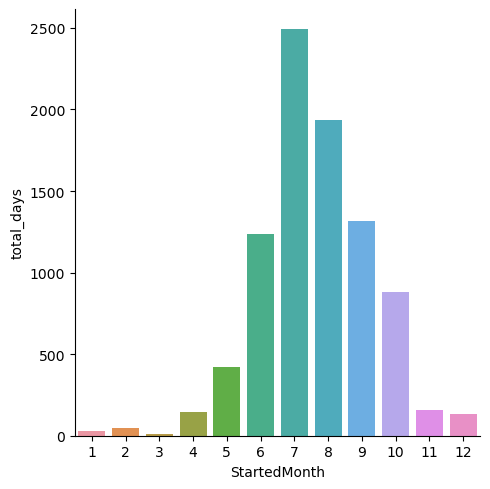

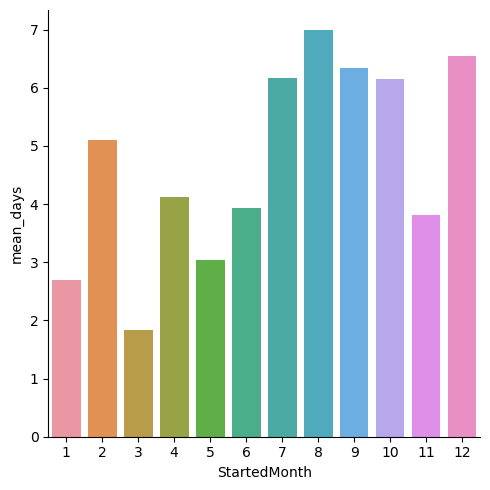

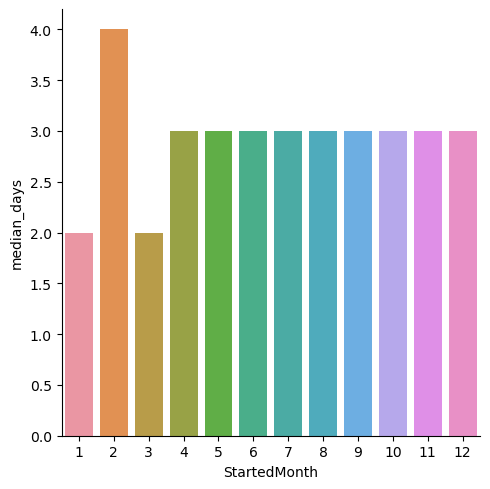

In [208]:
# Monthly distributions about fires
for c in fires_by_month_df.columns:
    sns.catplot(x='StartedMonth', y=c, data=fires_by_month_df.reset_index(), kind='bar')

Throughout the year, there are no real surprises: the summer and autumn months contain the most fires, but there are some clear extreme outliers in certain off-season months, such as December and February.

In [209]:
county_climate_avg_per_month_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 540 entries, ('Alameda', 1) to ('Yuba', 12)
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ETo (in)              540 non-null    float64
 1   Precip (in)           540 non-null    float64
 2   Sol Rad (Ly/day)      540 non-null    float64
 3   Avg Vap Pres (mBars)  540 non-null    float64
 4   Max Air Temp (F)      540 non-null    float64
 5   Min Air Temp (F)      540 non-null    float64
 6   Avg Air Temp (F)      540 non-null    float64
 7   Max Rel Hum (%)       540 non-null    float64
 8   Min Rel Hum (%)       540 non-null    float64
 9   Avg Rel Hum (%)       540 non-null    float64
 10  Dew Point (F)         540 non-null    float64
 11  Avg Wind Speed (mph)  540 non-null    float64
 12  Wind Run (miles)      540 non-null    float64
 13  Avg Soil Temp (F)     540 non-null    float64
dtypes: float64(14)
memory usage: 60.7+ KB


In [210]:
county_fires_by_month_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 342 entries, ('Alameda', 5) to ('Yuba', 10)
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   total_fires      342 non-null    int64  
 1   total_acres      342 non-null    float64
 2   mean_acres       342 non-null    float64
 3   median_acres     342 non-null    float64
 4   total_days       342 non-null    float64
 5   mean_days        342 non-null    float64
 6   median_days      342 non-null    float64
 7   month_fire_prop  342 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 33.1+ KB


Below is a combination of monthly climate per county and monthly fire data per county.

In [211]:
county_climate_fire_df = county_fires_by_month_df.merge(county_climate_avg_per_month_df, how='left',
                                                        left_index=True, right_on=['County','Month'])
county_climate_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 342 entries, ('Alameda', 5) to ('Yuba', 10)
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_fires           342 non-null    int64  
 1   total_acres           342 non-null    float64
 2   mean_acres            342 non-null    float64
 3   median_acres          342 non-null    float64
 4   total_days            342 non-null    float64
 5   mean_days             342 non-null    float64
 6   median_days           342 non-null    float64
 7   month_fire_prop       342 non-null    float64
 8   ETo (in)              282 non-null    float64
 9   Precip (in)           282 non-null    float64
 10  Sol Rad (Ly/day)      282 non-null    float64
 11  Avg Vap Pres (mBars)  282 non-null    float64
 12  Max Air Temp (F)      282 non-null    float64
 13  Min Air Temp (F)      282 non-null    float64
 14  Avg Air Temp (F)      282 non-null    float64
 15  M

In [212]:
county_climate_fire_df_subset = county_climate_fire_df.dropna()
county_climate_fire_df_subset = county_climate_fire_df.drop(columns=['Max Air Temp (F)', 'Min Air Temp (F)',
                                                                     'Max Rel Hum (%)', 'Min Rel Hum (%)'])
county_climate_fire_df_subset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 342 entries, ('Alameda', 5) to ('Yuba', 10)
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_fires           342 non-null    int64  
 1   total_acres           342 non-null    float64
 2   mean_acres            342 non-null    float64
 3   median_acres          342 non-null    float64
 4   total_days            342 non-null    float64
 5   mean_days             342 non-null    float64
 6   median_days           342 non-null    float64
 7   month_fire_prop       342 non-null    float64
 8   ETo (in)              282 non-null    float64
 9   Precip (in)           282 non-null    float64
 10  Sol Rad (Ly/day)      282 non-null    float64
 11  Avg Vap Pres (mBars)  282 non-null    float64
 12  Avg Air Temp (F)      282 non-null    float64
 13  Avg Rel Hum (%)       282 non-null    float64
 14  Dew Point (F)         282 non-null    float64
 15  A

In [213]:
# This makes a lot of graphs, so it is commented out. The next plots are the ones that seemed to have the most patterns.
#f_x = county_climate_fire_df_subset.columns[:8]
#clim_y = county_climate_fire_df_subset.columns[8:]

#for x in f_x:
#    for y in clim_y:
#        sns.relplot(data=county_climate_fire_df_subset, x=x, y=y, kind='scatter')

In [214]:
county_climate_fire_df_subset.describe()

,total_fires,total_acres,mean_acres,median_acres,total_days,mean_days,median_days,month_fire_prop,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
count,342.000000,342.00000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,4.692982,15210.77193,3014.688705,1255.878655,25.719642,5.428154,4.307116,0.035088,0.181709,0.024036,511.007747,12.055959,64.394275,58.703187,47.856636,4.303110,103.273512,66.319114
std,4.840192,46590.06425,10558.367543,6159.232003,39.511843,6.939678,6.443861,0.045149,0.070384,0.037208,158.409034,3.134807,9.438478,13.811917,8.024182,1.049536,25.190895,8.423800
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002475,0.024946,0.000000,102.193548,3.245882,33.537821,27.090909,15.551765,2.487019,59.649038,37.898718
25%,1.000000,165.75000,78.887500,51.125000,3.000000,2.000000,2.000000,0.009662,0.134957,0.001204,395.731084,9.715118,58.867360,47.821952,42.713816,3.562123,85.515597,61.325013
50%,3.000000,1128.50000,302.727273,105.500000,12.000000,3.000000,3.000000,0.022277,0.188493,0.007266,552.992938,12.187175,64.659265,58.468329,49.295328,4.170290,100.105830,68.209305
75%,6.000000,7472.50000,1481.834783,311.000000,30.000000,6.000000,3.500000,0.039604,0.238619,0.031865,638.230045,14.227436,71.828702,68.973750,53.717820,4.952239,118.909308,72.094238
max,30.000000,459268.00000,114817.000000,76668.000000,354.000000,60.000000,60.000000,0.333333,0.301114,0.252106,738.944444,19.964835,84.613163,93.677419,63.305495,9.068817,217.668280,83.298987


In [215]:
f_x = ['total_fires', 'total_days']
clim_y = county_climate_fire_df_subset.columns[8:]

#for x in f_x:
#    for y in clim_y:
#        sns.relplot(data=county_climate_fire_df_subset, x=x, y=y, kind='scatter', hue='total_acres', palette='flare')

# Commented out for redundancy. The scatter plots just below are the same, but they are colored a little differently.
# Due to the extreme outliers in total_acres, total_acres alone is not very good at coloring because almost all the fires
# will be roughly the same color.

This is just a quick reuse of the old categorizing function used above for the [heatmap](#5.5-Location-Mapping)--which itself was a rudimentary illustration of fire intensity for the heatmap--but a fire's intensity cannot simply be acres burned because of the high-valued outliers and the minimum is the rounded integer of zero.

In [216]:
county_climate_fire_df_subset['total_acres'].quantile(.33)

307.71000000000004

In [217]:
county_climate_fire_df_subset['total_acres'].quantile(.67)

3815.650000000005

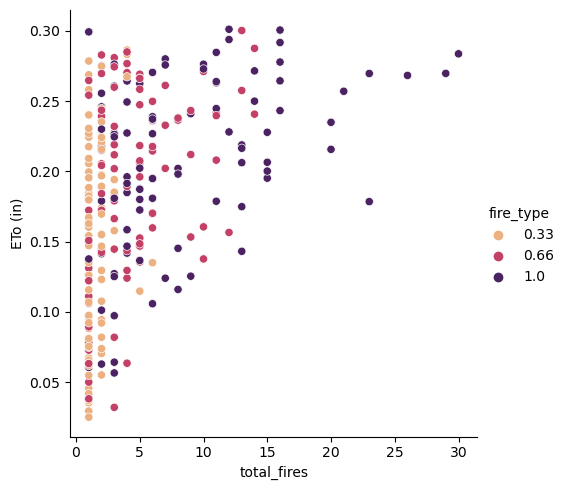

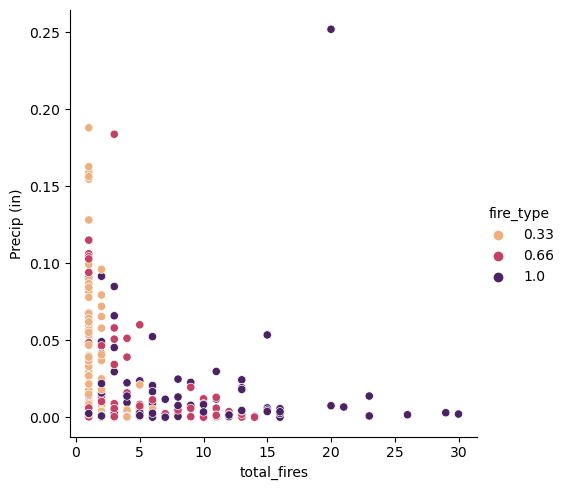

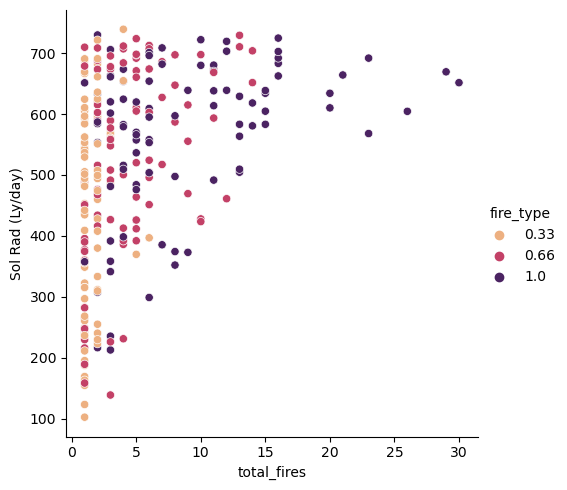

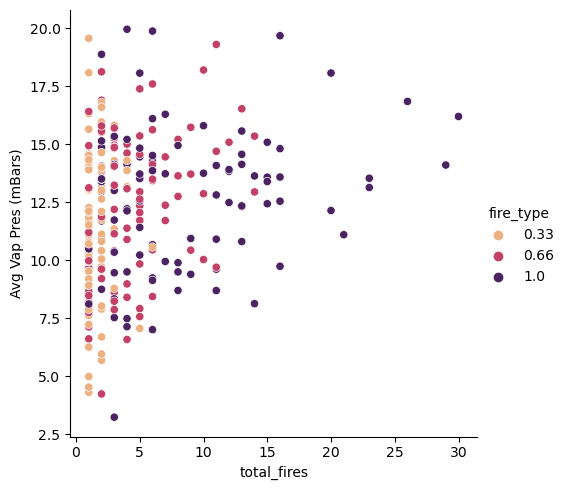

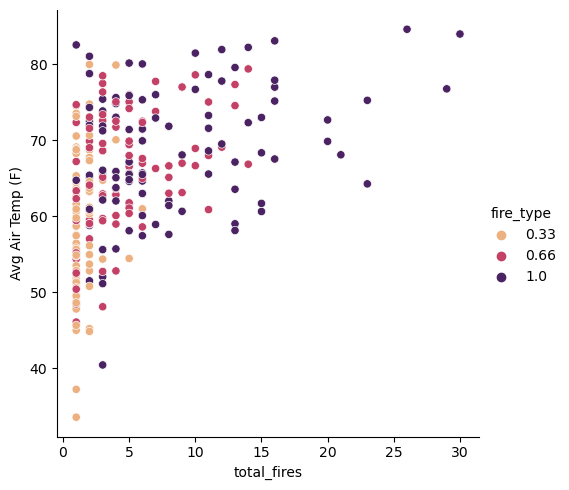

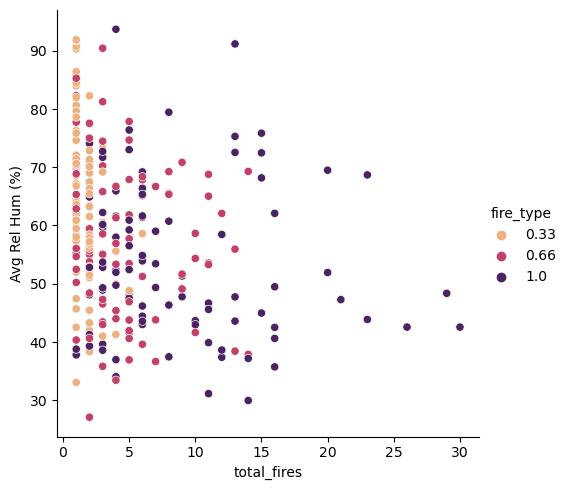

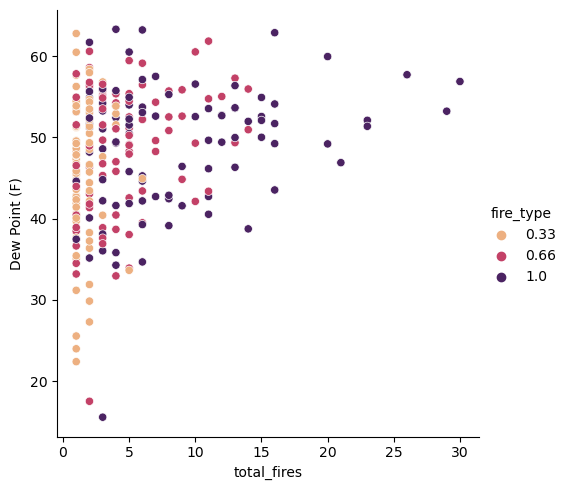

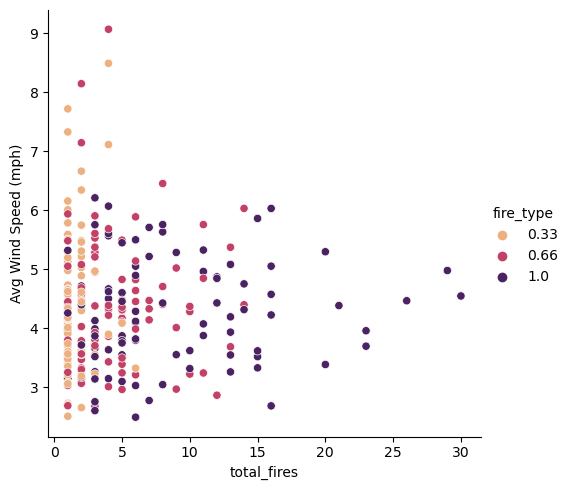

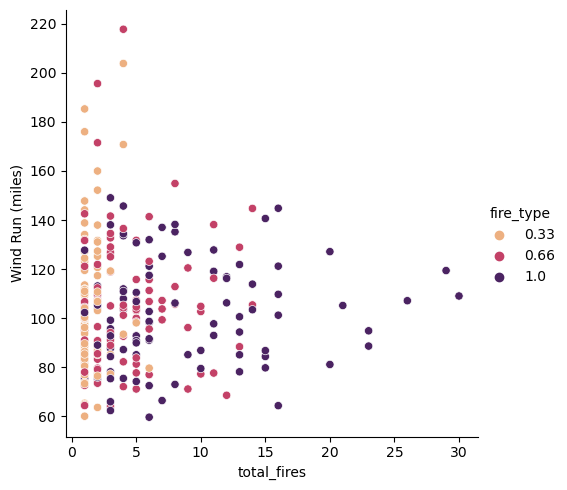

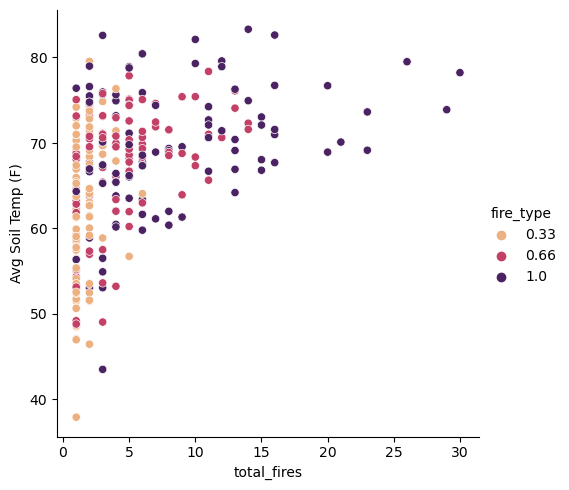

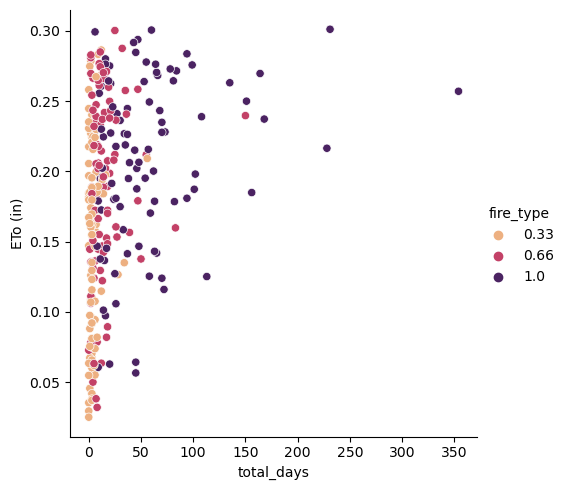

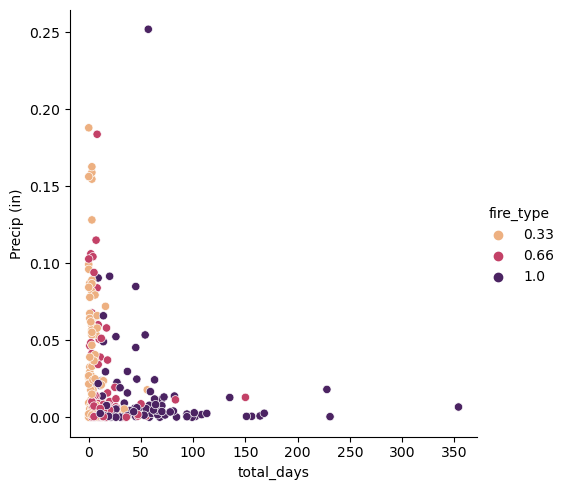

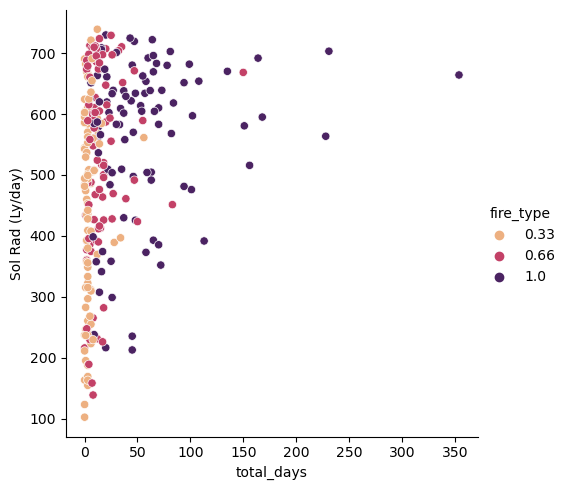

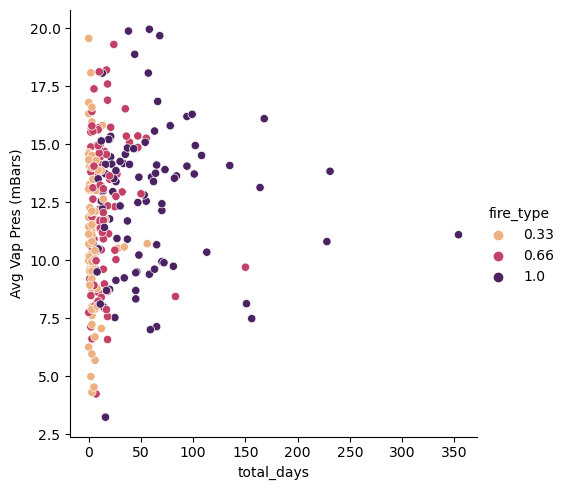

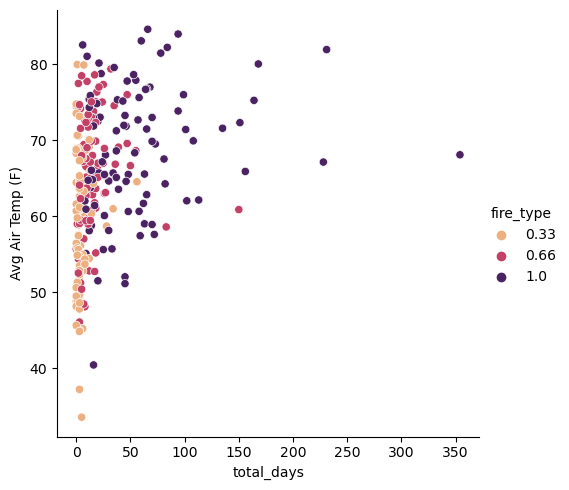

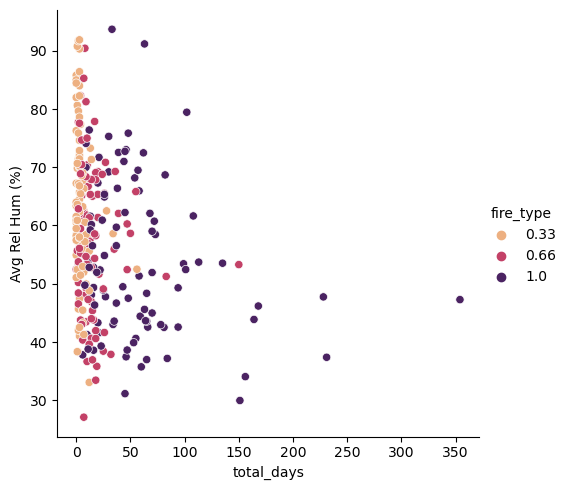

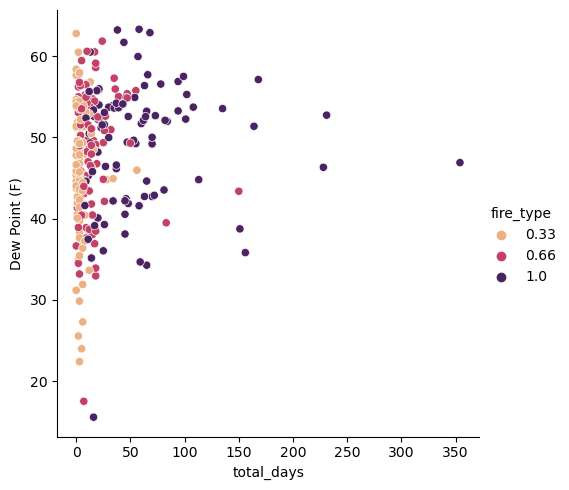

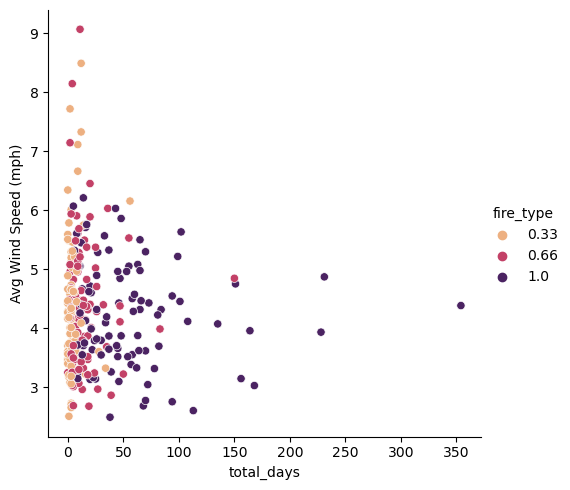

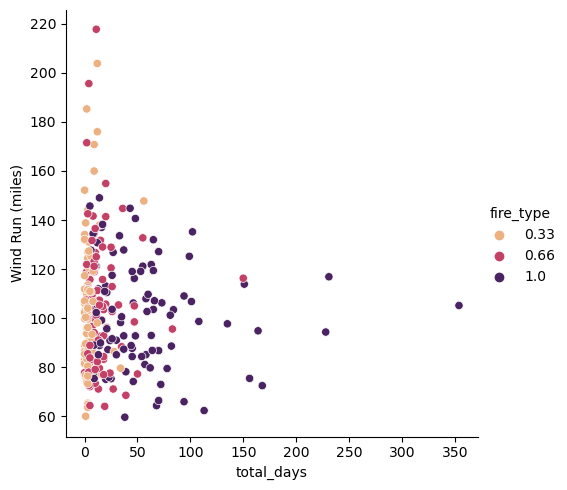

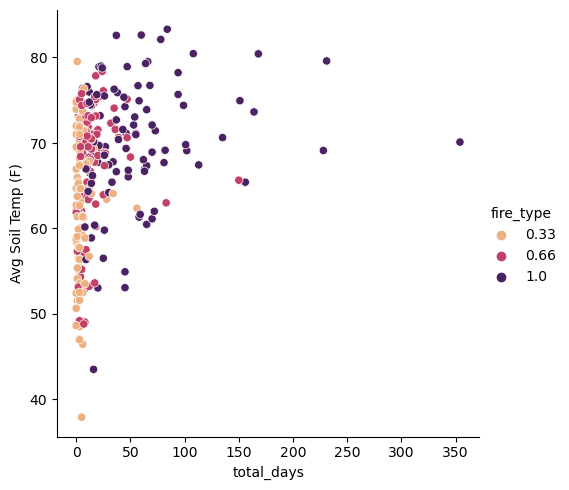

In [218]:
acres_burned_cat = [categorize_by_acre(x, type_3=3815, type_2=307) for x in county_climate_fire_df_subset['total_acres']]
county_climate_fire_df_subset['fire_type'] = acres_burned_cat

for x in f_x:
    for y in clim_y:
        sns.relplot(data=county_climate_fire_df_subset, x=x, y=y, kind='scatter',
                    hue='fire_type', palette='flare')

When divided like this, it becomes more apparent that larger fires likely have more relation to the climate, whereas smaller fires have almost no relation to fires. This is not surprising, since certain climate conditions may spread fires more and other climate conditions may obstruct response teams, and perhaps small fires could more often be started by random or unnatural causes.

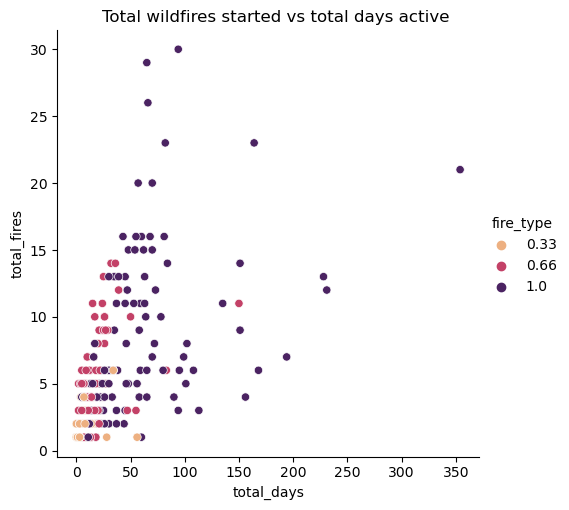

In [219]:
g = sns.relplot(data=county_climate_fire_df_subset, x='total_days', y='total_fires', kind='scatter',
            hue='fire_type', palette='flare')
_ = g.fig.suptitle('Total wildfires started vs total days active', y=1.01)
plt.show()

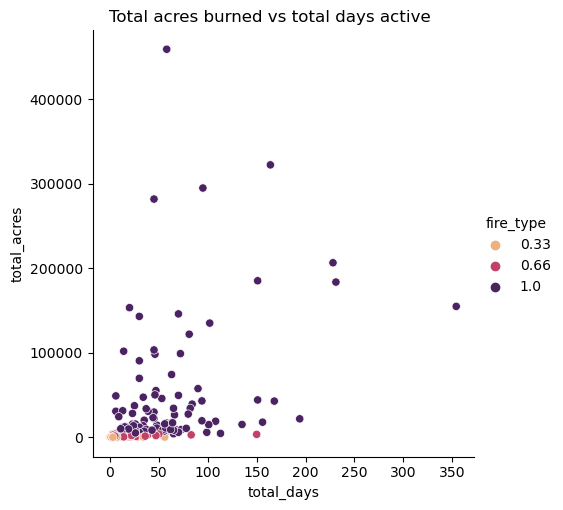

In [220]:
g = sns.relplot(data=county_climate_fire_df_subset, x='total_days', y='total_acres', kind='scatter',
            hue='fire_type', palette='flare')
_ = g.fig.suptitle('Total acres burned vs total days active', y=1.01)
plt.show()

## 6 Summary

To reiterate from the introduction, the purpose of this notebook was to explore, clean, and create new features.

**Tidying Data**:

The original fire data (in `fire_df`) was pruned and cleaned, and a few features were added. Excessively missing values were dropped, and lesser missing values of features that were deemed important to keep were largely consolidated by cross-referencing online sources or by imputation. Bad geolocation values were generally approximated to their county locations. The `fire_df` was given more features. `ActiveDays` represents the number of days from the recorded `Started` day to the `Extinguished` day. Adding this feature clearly illustrated the unreliability of the given `Extinguished` dates in 2018 and 2019, which had many of the same dates within a week in January—likely a default assigned value. These values were fixed with an aggressive median imputation or, if they were considered a "large" fire, through cross-references online. The `Started` timestamp was split into two new columns, `StartedMonth` and `StartedYear`.

The `climate_df` did not have as many missing values. These were almost unanimously imputed by their means given by their month and the same station (ID) or neighboring stations (those in the same county).

**Adding Data**:

New monthly features were added for both climate by county and fires. These can be found in `county_climate_avg_per_month_df` and `fires_by_month`.

To the `county_df`, a few fire-related features were aggregated per county: the amount of acres burned (`AcresBurned`), the number of fires in the county (`FireStartCounts`), the number of acres burned per fire (`AcresPerFireCount`).

New county data was also added: the 2022 population, area in square miles, and the population density. More census data can be acquired, but for now, a rough estimate of the population may suffice. It is probable that the population has not changed dramatically within the past few years. There is also a `county_fires_by_month_df`, which divides the county fire statistics into months as well.

**Visualizations and Analysis**:

To illustrate the fires’ locations, a quick scatterplot can be generated. Otherwise, we can draw a heatmap. The maps clearly show the specific areas where wildfires more commonly and more intensely occur. These are very often mountainous regions with a lot of forests and chaparrals.

Most fires occurred in the warm months and in the years 2017 and 2018. The number of fires and the size of each fire tend to be slightly higher with the size of a county. Counties with lower populations tend to have larger and more numerous fires. These correlations are both somewhat weak. Other factors that influence fires could be the accessibility and proximity to civilization.

One thing that can be noted is that larger and longer fires seem to have a bit more correlation with the climate, as seen in the graphs colored by the burned acres divided into percentiles. Smaller fires have almost no relation to climate, and this is not that surprising.

Using counties to aggregate information comes with its issues, and the latitude and longitude are probably more indicative of the local environment of the fires, assuming they were input correctly, because counties tend to have irregular boundaries and a diverse terrain. That being said, the county patterns are not wholly irrelevant: larger counties tend to encompass one or more areas that may frequently have fires, such as forests or national parks, so size and population density may not be that bad to keep under consideration. Climate information would also vary a lot within a county as well. For example, within San Bernardino county, if you are in the typical suburban areas of Chino or Redlands, it tends to be hot throughout the year, but at the same time, it could be snowing in the San Bernardino Mountains. There is also perhaps another useful point about generalizing by county: policies, economics, and resources may be divided by county, so maybe we still should care about the countywide statistics.

Overall, the data we currently have seems insufficient to help explain fires very well. The fuel type is extremely important, but we lack this information.

### 6.1 Save New DataFrames

In [221]:
fire_df.to_pickle('../data/interim/2-1_fire_df.pkl')
climate_df.to_pickle('../data/interim/2-1_climate_df.pkl')
county_df.to_pickle('../data/interim/2-1_county_df.pkl')
fires_by_month_df.to_pickle('../data/interim/2-1_fires_by_month_df.pkl')
county_climate_avg_per_month_df.to_pickle('../data/interim/2-1_county_climate_avg_per_month_df.pkl')
county_fires_by_month_df.to_pickle('../data/interim/2-1_county_fires_by_month_df.pkl')
county_climate_fire_df.to_pickle('../data/interim/2-1_county_climate_fire_df.pkl')
county_climate_fire_df_subset.to_pickle('../data/interim/2-1_county_climate_fire_df_subset.pkl')